In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [2]:
filename = 'planarity.txt'
with open(filename, 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()

for line in lines: print(line.strip())



Elément            Réel       Val. nom.           Ecart       Tol. sup.       Tol. inf.           OK/HT
(Dév PR)        (Tol PR)
Point-1(De 1 pt)
Coord. X =           36,789
Coord. Y =          135,055
Coord. Z =            1,449

Point-2[1,1](De 1 pt)
Coord. X =            0,000
Coord. Y =            0,000
Coord. Z =            0,000

Point-2[1,2](De 1 pt)
Coord. X =            0,000
Coord. Y =            2,000
Coord. Z =           -0,006

Point-2[1,3](De 0 pt)
****
****
****

Point-2[1,4](De 1 pt)
Coord. X =            0,000
Coord. Y =            6,000
Coord. Z =           -0,018

Point-2[1,5](De 1 pt)
Coord. X =            0,000
Coord. Y =            8,000
Coord. Z =           -0,023

Point-2[1,6](De 0 pt)
****
****
****

Point-2[1,7](De 1 pt)
Coord. X =            0,000
Coord. Y =           12,000
Coord. Z =           -0,028

Point-2[1,8](De 1 pt)
Coord. X =            0,000
Coord. Y =           14,000
Coord. Z =           -0,197

Point-2[1,9](De 1 pt)
Coord. X =            0,000


Coord. X =           10,000
Coord. Y =           14,000
Coord. Z =           -0,205

Point-2[6,9](De 1 pt)
Coord. X =           10,000
Coord. Y =           16,000
Coord. Z =           -0,044

Point-2[6,10](De 0 pt)
****
****
****

Point-2[6,11](De 0 pt)
****
****
****

Point-2[6,12](De 1 pt)
Coord. X =           10,000
Coord. Y =           22,000
Coord. Z =           -0,057

Point-2[6,13](De 1 pt)
Coord. X =           10,000
Coord. Y =           24,000
Coord. Z =           -0,051

Point-2[6,14](De 1 pt)
Coord. X =           10,000
Coord. Y =           26,000
Coord. Z =           -0,050

Point-2[6,15](De 0 pt)
****
****
****

Point-2[6,16](De 0 pt)
****
****
****

Point-2[6,17](De 1 pt)
Coord. X =           10,000
Coord. Y =           32,000
Coord. Z =           -0,046

Point-2[6,18](De 1 pt)
Coord. X =           10,000
Coord. Y =           34,000
Coord. Z =           -0,051

Point-2[6,19](De 1 pt)
Coord. X =           10,000
Coord. Y =           36,000
Coord. Z =           -0,213

Poin

Coord. X =           20,000
Coord. Y =           50,000
Coord. Z =           -0,043

Point-2[11,27](De 1 pt)
Coord. X =           20,000
Coord. Y =           52,000
Coord. Z =           -0,205

Point-2[11,28](De 1 pt)
Coord. X =           20,000
Coord. Y =           54,000
Coord. Z =           -0,041

Point-2[11,29](De 0 pt)
****
****
****

Point-2[11,30](De 1 pt)
Coord. X =           20,000
Coord. Y =           58,000
Coord. Z =           -0,211

Point-2[11,31](De 1 pt)
Coord. X =           20,000
Coord. Y =           60,000
Coord. Z =           -0,212

Point-2[11,32](De 1 pt)
Coord. X =           20,000
Coord. Y =           62,000
Coord. Z =           -0,214

Point-2[11,33](De 1 pt)
Coord. X =           20,000
Coord. Y =           64,000
Coord. Z =           -0,051

Point-2[11,34](De 1 pt)
Coord. X =           20,000
Coord. Y =           66,000
Coord. Z =           -0,051

Point-2[11,35](De 1 pt)
Coord. X =           20,000
Coord. Y =           68,000
Coord. Z =           -0,051

Poi

Coord. Y =           26,000
Coord. Z =           -0,047

Point-2[16,15](De 1 pt)
Coord. X =           30,000
Coord. Y =           28,000
Coord. Z =           -0,048

Point-2[16,16](De 1 pt)
Coord. X =           30,000
Coord. Y =           30,000
Coord. Z =           -0,046

Point-2[16,17](De 1 pt)
Coord. X =           30,000
Coord. Y =           32,000
Coord. Z =           -0,207

Point-2[16,18](De 1 pt)
Coord. X =           30,000
Coord. Y =           34,000
Coord. Z =           -0,207

Point-2[16,19](De 1 pt)
Coord. X =           30,000
Coord. Y =           36,000
Coord. Z =           -0,205

Point-2[16,20](De 1 pt)
Coord. X =           30,000
Coord. Y =           38,000
Coord. Z =           -0,042

Point-2[16,21](De 0 pt)
****
****
****

Point-2[16,22](De 0 pt)
****
****
****

Point-2[16,23](De 1 pt)
Coord. X =           30,000
Coord. Y =           44,000
Coord. Z =           -0,041

Point-2[16,24](De 1 pt)
Coord. X =           30,000
Coord. Y =           46,000
Coord. Z =          


Point-2[20,64](De 1 pt)
Coord. X =           38,000
Coord. Y =          126,000
Coord. Z =           -0,180

Point-2[20,65](De 1 pt)
Coord. X =           38,000
Coord. Y =          128,000
Coord. Z =           -0,181

Point-2[20,66](De 1 pt)
Coord. X =           38,000
Coord. Y =          130,000
Coord. Z =            0,069

Point-2[20,67](De 1 pt)
Coord. X =           38,000
Coord. Y =          132,000
Coord. Z =            0,074

Point-2[20,68](De 1 pt)
Coord. X =           38,000
Coord. Y =          134,000
Coord. Z =            0,074

Point-2[20,69](De 1 pt)
Coord. X =           38,000
Coord. Y =          136,000
Coord. Z =           -0,325

Point-2[20,70](De 1 pt)
Coord. X =           38,000
Coord. Y =          138,000
Coord. Z =           -0,322

Point-2[21,1](De 1 pt)
Coord. X =           40,000
Coord. Y =            0,000
Coord. Z =            0,009

Point-2[21,2](De 1 pt)
Coord. X =           40,000
Coord. Y =            2,000
Coord. Z =            0,003

Point-2[21,3](De 1 p

Point-2[25,68](De 1 pt)
Coord. X =           48,000
Coord. Y =          134,000
Coord. Z =            0,064

Point-2[25,69](De 1 pt)
Coord. X =           48,000
Coord. Y =          136,000
Coord. Z =           -0,332

Point-2[25,70](De 1 pt)
Coord. X =           48,000
Coord. Y =          138,000
Coord. Z =           -0,327

Point-2[26,1](De 1 pt)
Coord. X =           50,000
Coord. Y =            0,000
Coord. Z =            0,020

Point-2[26,2](De 1 pt)
Coord. X =           50,000
Coord. Y =            2,000
Coord. Z =            0,009

Point-2[26,3](De 1 pt)
Coord. X =           50,000
Coord. Y =            4,000
Coord. Z =           -0,152

Point-2[26,4](De 1 pt)
Coord. X =           50,000
Coord. Y =            6,000
Coord. Z =            0,003

Point-2[26,5](De 1 pt)
Coord. X =           50,000
Coord. Y =            8,000
Coord. Z =           -0,160

Point-2[26,6](De 1 pt)
Coord. X =           50,000
Coord. Y =           10,000
Coord. Z =           -0,163

Point-2[26,7](De 1 pt)
Co

Point-2[31,3](De 1 pt)
Coord. X =           60,000
Coord. Y =            4,000
Coord. Z =            0,022

Point-2[31,4](De 0 pt)
****
****
****

Point-2[31,5](De 1 pt)
Coord. X =           60,000
Coord. Y =            8,000
Coord. Z =            0,020

Point-2[31,6](De 1 pt)
Coord. X =           60,000
Coord. Y =           10,000
Coord. Z =           -0,154

Point-2[31,7](De 1 pt)
Coord. X =           60,000
Coord. Y =           12,000
Coord. Z =           -0,151

Point-2[31,8](De 1 pt)
Coord. X =           60,000
Coord. Y =           14,000
Coord. Z =           -0,156

Point-2[31,9](De 1 pt)
Coord. X =           60,000
Coord. Y =           16,000
Coord. Z =            0,009

Point-2[31,10](De 1 pt)
Coord. X =           60,000
Coord. Y =           18,000
Coord. Z =            0,009

Point-2[31,11](De 1 pt)
Coord. X =           60,000
Coord. Y =           20,000
Coord. Z =           -0,163

Point-2[31,12](De 1 pt)
Coord. X =           60,000
Coord. Y =           22,000
Coord. Z =     

Coord. Y =          104,000
Coord. Z =           -0,201

Point-2[35,54](De 1 pt)
Coord. X =           68,000
Coord. Y =          106,000
Coord. Z =           -0,199

Point-2[35,55](De 1 pt)
Coord. X =           68,000
Coord. Y =          108,000
Coord. Z =           -0,200

Point-2[35,56](De 1 pt)
Coord. X =           68,000
Coord. Y =          110,000
Coord. Z =           -0,198

Point-2[35,57](De 1 pt)
Coord. X =           68,000
Coord. Y =          112,000
Coord. Z =           -0,193

Point-2[35,58](De 1 pt)
Coord. X =           68,000
Coord. Y =          114,000
Coord. Z =           -0,183

Point-2[35,59](De 1 pt)
Coord. X =           68,000
Coord. Y =          116,000
Coord. Z =           -0,190

Point-2[35,60](De 1 pt)
Coord. X =           68,000
Coord. Y =          118,000
Coord. Z =           -0,191

Point-2[35,61](De 1 pt)
Coord. X =           68,000
Coord. Y =          120,000
Coord. Z =           -0,194

Point-2[35,62](De 1 pt)
Coord. X =           68,000
Coord. Y =         

Coord. Y =           60,000
Coord. Z =           -0,224

Point-2[40,32](De 1 pt)
Coord. X =           78,000
Coord. Y =           62,000
Coord. Z =            0,025

Point-2[40,33](De 1 pt)
Coord. X =           78,000
Coord. Y =           64,000
Coord. Z =            0,027

Point-2[40,34](De 1 pt)
Coord. X =           78,000
Coord. Y =           66,000
Coord. Z =            0,032

Point-2[40,35](De 1 pt)
Coord. X =           78,000
Coord. Y =           68,000
Coord. Z =           -0,211

Point-2[40,36](De 0 pt)
****
****
****

Point-2[40,37](De 1 pt)
Coord. X =           78,000
Coord. Y =           72,000
Coord. Z =           -0,202

Point-2[40,38](De 1 pt)
Coord. X =           78,000
Coord. Y =           74,000
Coord. Z =           -0,200

Point-2[40,39](De 1 pt)
Coord. X =           78,000
Coord. Y =           76,000
Coord. Z =           -0,192

Point-2[40,40](De 1 pt)
Coord. X =           78,000
Coord. Y =           78,000
Coord. Z =           -0,191

Point-2[40,41](De 1 pt)
Coord. 

Coord. X =           88,000
Coord. Y =           98,000
Coord. Z =           -0,160

Point-2[45,51](De 1 pt)
Coord. X =           88,000
Coord. Y =          100,000
Coord. Z =           -0,162

Point-2[45,52](De 1 pt)
Coord. X =           88,000
Coord. Y =          102,000
Coord. Z =           -0,162

Point-2[45,53](De 1 pt)
Coord. X =           88,000
Coord. Y =          104,000
Coord. Z =           -0,163

Point-2[45,54](De 1 pt)
Coord. X =           88,000
Coord. Y =          106,000
Coord. Z =           -0,163

Point-2[45,55](De 1 pt)
Coord. X =           88,000
Coord. Y =          108,000
Coord. Z =           -0,165

Point-2[45,56](De 1 pt)
Coord. X =           88,000
Coord. Y =          110,000
Coord. Z =           -0,167

Point-2[45,57](De 1 pt)
Coord. X =           88,000
Coord. Y =          112,000
Coord. Z =           -0,170

Point-2[45,58](De 1 pt)
Coord. X =           88,000
Coord. Y =          114,000
Coord. Z =           -0,170

Point-2[45,59](De 1 pt)
Coord. X =         

Coord. Z =           -0,106

Point-2[53,43](De 1 pt)
Coord. X =          104,000
Coord. Y =           84,000
Coord. Z =           -0,109

Point-2[53,44](De 1 pt)
Coord. X =          104,000
Coord. Y =           86,000
Coord. Z =           -0,115

Point-2[53,45](De 1 pt)
Coord. X =          104,000
Coord. Y =           88,000
Coord. Z =           -0,120

Point-2[53,46](De 1 pt)
Coord. X =          104,000
Coord. Y =           90,000
Coord. Z =           -0,126

Point-2[53,47](De 1 pt)
Coord. X =          104,000
Coord. Y =           92,000
Coord. Z =           -0,133

Point-2[53,48](De 1 pt)
Coord. X =          104,000
Coord. Y =           94,000
Coord. Z =           -0,140

Point-2[53,49](De 1 pt)
Coord. X =          104,000
Coord. Y =           96,000
Coord. Z =           -0,147

Point-2[53,50](De 1 pt)
Coord. X =          104,000
Coord. Y =           98,000
Coord. Z =           -0,153

Point-2[53,51](De 1 pt)
Coord. X =          104,000
Coord. Y =          100,000
Coord. Z =         

Coord. Y =           76,000
Coord. Z =           -0,084

Point-2[58,40](De 1 pt)
Coord. X =          114,000
Coord. Y =           78,000
Coord. Z =           -0,088

Point-2[58,41](De 1 pt)
Coord. X =          114,000
Coord. Y =           80,000
Coord. Z =           -0,092

Point-2[58,42](De 1 pt)
Coord. X =          114,000
Coord. Y =           82,000
Coord. Z =           -0,098

Point-2[58,43](De 1 pt)
Coord. X =          114,000
Coord. Y =           84,000
Coord. Z =           -0,102

Point-2[58,44](De 1 pt)
Coord. X =          114,000
Coord. Y =           86,000
Coord. Z =           -0,109

Point-2[58,45](De 1 pt)
Coord. X =          114,000
Coord. Y =           88,000
Coord. Z =           -0,116

Point-2[58,46](De 1 pt)
Coord. X =          114,000
Coord. Y =           90,000
Coord. Z =           -0,122

Point-2[58,47](De 1 pt)
Coord. X =          114,000
Coord. Y =           92,000
Coord. Z =           -0,130

Point-2[58,48](De 1 pt)
Coord. X =          114,000
Coord. Y =         

Coord. X =          124,000
Coord. Y =           62,000
Coord. Z =           -0,091

Point-2[63,33](De 1 pt)
Coord. X =          124,000
Coord. Y =           64,000
Coord. Z =           -0,093

Point-2[63,34](De 1 pt)
Coord. X =          124,000
Coord. Y =           66,000
Coord. Z =           -0,094

Point-2[63,35](De 1 pt)
Coord. X =          124,000
Coord. Y =           68,000
Coord. Z =           -0,096

Point-2[63,36](De 1 pt)
Coord. X =          124,000
Coord. Y =           70,000
Coord. Z =           -0,097

Point-2[63,37](De 1 pt)
Coord. X =          124,000
Coord. Y =           72,000
Coord. Z =           -0,098

Point-2[63,38](De 1 pt)
Coord. X =          124,000
Coord. Y =           74,000
Coord. Z =           -0,101

Point-2[63,39](De 1 pt)
Coord. X =          124,000
Coord. Y =           76,000
Coord. Z =           -0,104

Point-2[63,40](De 1 pt)
Coord. X =          124,000
Coord. Y =           78,000
Coord. Z =           -0,107

Point-2[63,41](De 1 pt)
Coord. X =         

Coord. Y =           26,000
Coord. Z =           -0,207

Point-2[68,15](De 1 pt)
Coord. X =          134,000
Coord. Y =           28,000
Coord. Z =           -0,209

Point-2[68,16](De 1 pt)
Coord. X =          134,000
Coord. Y =           30,000
Coord. Z =           -0,210

Point-2[68,17](De 1 pt)
Coord. X =          134,000
Coord. Y =           32,000
Coord. Z =           -0,215

Point-2[68,18](De 1 pt)
Coord. X =          134,000
Coord. Y =           34,000
Coord. Z =           -0,220

Point-2[68,19](De 1 pt)
Coord. X =          134,000
Coord. Y =           36,000
Coord. Z =           -0,225

Point-2[68,20](De 1 pt)
Coord. X =          134,000
Coord. Y =           38,000
Coord. Z =           -0,234

Point-2[68,21](De 1 pt)
Coord. X =          134,000
Coord. Y =           40,000
Coord. Z =           -0,241

Point-2[68,22](De 1 pt)
Coord. X =          134,000
Coord. Y =           42,000
Coord. Z =           -0,246

Point-2[68,23](De 1 pt)
Coord. X =          134,000
Coord. Y =         

In [3]:
# Skip the first 3 lines (header)
for line in lines[3:-8]:
    print(line.strip())

Point-1(De 1 pt)
Coord. X =           36,789
Coord. Y =          135,055
Coord. Z =            1,449

Point-2[1,1](De 1 pt)
Coord. X =            0,000
Coord. Y =            0,000
Coord. Z =            0,000

Point-2[1,2](De 1 pt)
Coord. X =            0,000
Coord. Y =            2,000
Coord. Z =           -0,006

Point-2[1,3](De 0 pt)
****
****
****

Point-2[1,4](De 1 pt)
Coord. X =            0,000
Coord. Y =            6,000
Coord. Z =           -0,018

Point-2[1,5](De 1 pt)
Coord. X =            0,000
Coord. Y =            8,000
Coord. Z =           -0,023

Point-2[1,6](De 0 pt)
****
****
****

Point-2[1,7](De 1 pt)
Coord. X =            0,000
Coord. Y =           12,000
Coord. Z =           -0,028

Point-2[1,8](De 1 pt)
Coord. X =            0,000
Coord. Y =           14,000
Coord. Z =           -0,197

Point-2[1,9](De 1 pt)
Coord. X =            0,000
Coord. Y =           16,000
Coord. Z =           -0,030

Point-2[1,10](De 1 pt)
Coord. X =            0,000
Coord. Y =           1

****
****

Point-2[2,45](De 0 pt)
****
****
****

Point-2[2,46](De 1 pt)
Coord. X =            2,000
Coord. Y =           90,000
Coord. Z =           -0,244

Point-2[2,47](De 1 pt)
Coord. X =            2,000
Coord. Y =           92,000
Coord. Z =           -0,238

Point-2[2,48](De 1 pt)
Coord. X =            2,000
Coord. Y =           94,000
Coord. Z =           -0,231

Point-2[2,49](De 1 pt)
Coord. X =            2,000
Coord. Y =           96,000
Coord. Z =           -0,221

Point-2[2,50](De 1 pt)
Coord. X =            2,000
Coord. Y =           98,000
Coord. Z =           -0,216

Point-2[2,51](De 1 pt)
Coord. X =            2,000
Coord. Y =          100,000
Coord. Z =           -0,210

Point-2[2,52](De 1 pt)
Coord. X =            2,000
Coord. Y =          102,000
Coord. Z =           -0,202

Point-2[2,53](De 1 pt)
Coord. X =            2,000
Coord. Y =          104,000
Coord. Z =           -0,192

Point-2[2,54](De 1 pt)
Coord. X =            2,000
Coord. Y =          106,000
Coord. 

Coord. Z =           -0,025

Point-2[5,67](De 1 pt)
Coord. X =            8,000
Coord. Y =          132,000
Coord. Z =            0,141

Point-2[5,68](De 1 pt)
Coord. X =            8,000
Coord. Y =          134,000
Coord. Z =           -0,008

Point-2[5,69](De 1 pt)
Coord. X =            8,000
Coord. Y =          136,000
Coord. Z =           -0,256

Point-2[5,70](De 1 pt)
Coord. X =            8,000
Coord. Y =          138,000
Coord. Z =           -0,247

Point-2[6,1](De 1 pt)
Coord. X =           10,000
Coord. Y =            0,000
Coord. Z =           -0,005

Point-2[6,2](De 1 pt)
Coord. X =           10,000
Coord. Y =            2,000
Coord. Z =           -0,009

Point-2[6,3](De 1 pt)
Coord. X =           10,000
Coord. Y =            4,000
Coord. Z =           -0,178

Point-2[6,4](De 1 pt)
Coord. X =           10,000
Coord. Y =            6,000
Coord. Z =           -0,021

Point-2[6,5](De 1 pt)
Coord. X =           10,000
Coord. Y =            8,000
Coord. Z =           -0,027

Poin

Coord. Z =           -0,225

Point-2[7,34](De 0 pt)
****
****
****

Point-2[7,35](De 1 pt)
Coord. X =           12,000
Coord. Y =           68,000
Coord. Z =           -0,043

Point-2[7,36](De 1 pt)
Coord. X =           12,000
Coord. Y =           70,000
Coord. Z =           -0,042

Point-2[7,37](De 1 pt)
Coord. X =           12,000
Coord. Y =           72,000
Coord. Z =           -0,037

Point-2[7,38](De 1 pt)
Coord. X =           12,000
Coord. Y =           74,000
Coord. Z =           -0,042

Point-2[7,39](De 1 pt)
Coord. X =           12,000
Coord. Y =           76,000
Coord. Z =           -0,275

Point-2[7,40](De 1 pt)
Coord. X =           12,000
Coord. Y =           78,000
Coord. Z =           -0,271

Point-2[7,41](De 1 pt)
Coord. X =           12,000
Coord. Y =           80,000
Coord. Z =           -0,269

Point-2[7,42](De 1 pt)
Coord. X =           12,000
Coord. Y =           82,000
Coord. Z =           -0,024

Point-2[7,43](De 1 pt)
Coord. X =           12,000
Coord. Y =       

Coord. Y =           76,000
Coord. Z =           -0,285

Point-2[10,40](De 1 pt)
Coord. X =           18,000
Coord. Y =           78,000
Coord. Z =           -0,282

Point-2[10,41](De 1 pt)
Coord. X =           18,000
Coord. Y =           80,000
Coord. Z =           -0,280

Point-2[10,42](De 1 pt)
Coord. X =           18,000
Coord. Y =           82,000
Coord. Z =           -0,278

Point-2[10,43](De 1 pt)
Coord. X =           18,000
Coord. Y =           84,000
Coord. Z =           -0,274

Point-2[10,44](De 1 pt)
Coord. X =           18,000
Coord. Y =           86,000
Coord. Z =           -0,266

Point-2[10,45](De 1 pt)
Coord. X =           18,000
Coord. Y =           88,000
Coord. Z =           -0,262

Point-2[10,46](De 1 pt)
Coord. X =           18,000
Coord. Y =           90,000
Coord. Z =           -0,257

Point-2[10,47](De 1 pt)
Coord. X =           18,000
Coord. Y =           92,000
Coord. Z =           -0,253

Point-2[10,48](De 1 pt)
Coord. X =           18,000
Coord. Y =         

Coord. X =           22,000
Coord. Y =           14,000
Coord. Z =           -0,203

Point-2[12,9](De 1 pt)
Coord. X =           22,000
Coord. Y =           16,000
Coord. Z =           -0,206

Point-2[12,10](De 1 pt)
Coord. X =           22,000
Coord. Y =           18,000
Coord. Z =           -0,209

Point-2[12,11](De 1 pt)
Coord. X =           22,000
Coord. Y =           20,000
Coord. Z =           -0,048

Point-2[12,12](De 1 pt)
Coord. X =           22,000
Coord. Y =           22,000
Coord. Z =           -0,212

Point-2[12,13](De 1 pt)
Coord. X =           22,000
Coord. Y =           24,000
Coord. Z =           -0,212

Point-2[12,14](De 1 pt)
Coord. X =           22,000
Coord. Y =           26,000
Coord. Z =           -0,214

Point-2[12,15](De 1 pt)
Coord. X =           22,000
Coord. Y =           28,000
Coord. Z =           -0,212

Point-2[12,16](De 1 pt)
Coord. X =           22,000
Coord. Y =           30,000
Coord. Z =           -0,049

Point-2[12,17](De 1 pt)
Coord. X =          

Point-2[15,9](De 1 pt)
Coord. X =           28,000
Coord. Y =           16,000
Coord. Z =           -0,037

Point-2[15,10](De 1 pt)
Coord. X =           28,000
Coord. Y =           18,000
Coord. Z =           -0,041

Point-2[15,11](De 1 pt)
Coord. X =           28,000
Coord. Y =           20,000
Coord. Z =           -0,044

Point-2[15,12](De 1 pt)
Coord. X =           28,000
Coord. Y =           22,000
Coord. Z =           -0,041

Point-2[15,13](De 0 pt)
****
****
****

Point-2[15,14](De 1 pt)
Coord. X =           28,000
Coord. Y =           26,000
Coord. Z =           -0,040

Point-2[15,15](De 0 pt)
****
****
****

Point-2[15,16](De 1 pt)
Coord. X =           28,000
Coord. Y =           30,000
Coord. Z =           -0,045

Point-2[15,17](De 1 pt)
Coord. X =           28,000
Coord. Y =           32,000
Coord. Z =           -0,039

Point-2[15,18](De 1 pt)
Coord. X =           28,000
Coord. Y =           34,000
Coord. Z =           -0,036

Point-2[15,19](De 0 pt)
****
****
****

Point-2[1

Coord. Y =           94,000
Coord. Z =           -0,262

Point-2[16,49](De 1 pt)
Coord. X =           30,000
Coord. Y =           96,000
Coord. Z =           -0,255

Point-2[16,50](De 1 pt)
Coord. X =           30,000
Coord. Y =           98,000
Coord. Z =           -0,248

Point-2[16,51](De 1 pt)
Coord. X =           30,000
Coord. Y =          100,000
Coord. Z =           -0,247

Point-2[16,52](De 1 pt)
Coord. X =           30,000
Coord. Y =          102,000
Coord. Z =           -0,233

Point-2[16,53](De 1 pt)
Coord. X =           30,000
Coord. Y =          104,000
Coord. Z =           -0,220

Point-2[16,54](De 1 pt)
Coord. X =           30,000
Coord. Y =          106,000
Coord. Z =           -0,217

Point-2[16,55](De 1 pt)
Coord. X =           30,000
Coord. Y =          108,000
Coord. Z =           -0,207

Point-2[16,56](De 1 pt)
Coord. X =           30,000
Coord. Y =          110,000
Coord. Z =           -0,198

Point-2[16,57](De 1 pt)
Coord. X =           30,000
Coord. Y =         

Coord. X =           36,000
Coord. Y =          100,000
Coord. Z =           -0,244

Point-2[19,52](De 1 pt)
Coord. X =           36,000
Coord. Y =          102,000
Coord. Z =           -0,236

Point-2[19,53](De 1 pt)
Coord. X =           36,000
Coord. Y =          104,000
Coord. Z =           -0,226

Point-2[19,54](De 1 pt)
Coord. X =           36,000
Coord. Y =          106,000
Coord. Z =           -0,217

Point-2[19,55](De 1 pt)
Coord. X =           36,000
Coord. Y =          108,000
Coord. Z =           -0,210

Point-2[19,56](De 1 pt)
Coord. X =           36,000
Coord. Y =          110,000
Coord. Z =           -0,202

Point-2[19,57](De 1 pt)
Coord. X =           36,000
Coord. Y =          112,000
Coord. Z =           -0,193

Point-2[19,58](De 1 pt)
Coord. X =           36,000
Coord. Y =          114,000
Coord. Z =           -0,191

Point-2[19,59](De 1 pt)
Coord. X =           36,000
Coord. Y =          116,000
Coord. Z =           -0,184

Point-2[19,60](De 1 pt)
Coord. X =         

Point-2[21,21](De 1 pt)
Coord. X =           40,000
Coord. Y =           40,000
Coord. Z =           -0,197

Point-2[21,22](De 1 pt)
Coord. X =           40,000
Coord. Y =           42,000
Coord. Z =           -0,198

Point-2[21,23](De 1 pt)
Coord. X =           40,000
Coord. Y =           44,000
Coord. Z =           -0,205

Point-2[21,24](De 0 pt)
****
****
****

Point-2[21,25](De 1 pt)
Coord. X =           40,000
Coord. Y =           48,000
Coord. Z =           -0,039

Point-2[21,26](De 1 pt)
Coord. X =           40,000
Coord. Y =           50,000
Coord. Z =           -0,203

Point-2[21,27](De 1 pt)
Coord. X =           40,000
Coord. Y =           52,000
Coord. Z =           -0,039

Point-2[21,28](De 1 pt)
Coord. X =           40,000
Coord. Y =           54,000
Coord. Z =           -0,038

Point-2[21,29](De 1 pt)
Coord. X =           40,000
Coord. Y =           56,000
Coord. Z =           -0,040

Point-2[21,30](De 1 pt)
Coord. X =           40,000
Coord. Y =           58,000
Coord. Z

Coord. Z =           -0,031

Point-2[24,25](De 1 pt)
Coord. X =           46,000
Coord. Y =           48,000
Coord. Z =           -0,032

Point-2[24,26](De 1 pt)
Coord. X =           46,000
Coord. Y =           50,000
Coord. Z =           -0,032

Point-2[24,27](De 0 pt)
****
****
****

Point-2[24,28](De 1 pt)
Coord. X =           46,000
Coord. Y =           54,000
Coord. Z =           -0,032

Point-2[24,29](De 1 pt)
Coord. X =           46,000
Coord. Y =           56,000
Coord. Z =           -0,265

Point-2[24,30](De 0 pt)
****
****
****

Point-2[24,31](De 1 pt)
Coord. X =           46,000
Coord. Y =           60,000
Coord. Z =           -0,028

Point-2[24,32](De 1 pt)
Coord. X =           46,000
Coord. Y =           62,000
Coord. Z =           -0,028

Point-2[24,33](De 1 pt)
Coord. X =           46,000
Coord. Y =           64,000
Coord. Z =           -0,029

Point-2[24,34](De 1 pt)
Coord. X =           46,000
Coord. Y =           66,000
Coord. Z =           -0,029

Point-2[24,35](De 1

Coord. Z =           -0,170

Point-2[28,11](De 1 pt)
Coord. X =           54,000
Coord. Y =           20,000
Coord. Z =           -0,172

Point-2[28,12](De 1 pt)
Coord. X =           54,000
Coord. Y =           22,000
Coord. Z =           -0,175

Point-2[28,13](De 1 pt)
Coord. X =           54,000
Coord. Y =           24,000
Coord. Z =           -0,015

Point-2[28,14](De 1 pt)
Coord. X =           54,000
Coord. Y =           26,000
Coord. Z =           -0,016

Point-2[28,15](De 1 pt)
Coord. X =           54,000
Coord. Y =           28,000
Coord. Z =           -0,182

Point-2[28,16](De 1 pt)
Coord. X =           54,000
Coord. Y =           30,000
Coord. Z =           -0,183

Point-2[28,17](De 0 pt)
****
****
****

Point-2[28,18](De 0 pt)
****
****
****

Point-2[28,19](De 0 pt)
****
****
****

Point-2[28,20](De 1 pt)
Coord. X =           54,000
Coord. Y =           38,000
Coord. Z =           -0,028

Point-2[28,21](De 0 pt)
****
****
****

Point-2[28,22](De 1 pt)
Coord. X =           54,

Coord. Y =           46,000
Coord. Z =           -0,030

Point-2[29,25](De 1 pt)
Coord. X =           56,000
Coord. Y =           48,000
Coord. Z =           -0,029

Point-2[29,26](De 1 pt)
Coord. X =           56,000
Coord. Y =           50,000
Coord. Z =           -0,271

Point-2[29,27](De 1 pt)
Coord. X =           56,000
Coord. Y =           52,000
Coord. Z =           -0,029

Point-2[29,28](De 1 pt)
Coord. X =           56,000
Coord. Y =           54,000
Coord. Z =           -0,271

Point-2[29,29](De 1 pt)
Coord. X =           56,000
Coord. Y =           56,000
Coord. Z =           -0,268

Point-2[29,30](De 1 pt)
Coord. X =           56,000
Coord. Y =           58,000
Coord. Z =           -0,272

Point-2[29,31](De 1 pt)
Coord. X =           56,000
Coord. Y =           60,000
Coord. Z =           -0,263

Point-2[29,32](De 1 pt)
Coord. X =           56,000
Coord. Y =           62,000
Coord. Z =           -0,269

Point-2[29,33](De 1 pt)
Coord. X =           56,000
Coord. Y =         

Coord. X =           60,000
Coord. Y =          108,000
Coord. Z =           -0,208

Point-2[31,56](De 1 pt)
Coord. X =           60,000
Coord. Y =          110,000
Coord. Z =           -0,206

Point-2[31,57](De 1 pt)
Coord. X =           60,000
Coord. Y =          112,000
Coord. Z =           -0,204

Point-2[31,58](De 1 pt)
Coord. X =           60,000
Coord. Y =          114,000
Coord. Z =           -0,202

Point-2[31,59](De 1 pt)
Coord. X =           60,000
Coord. Y =          116,000
Coord. Z =           -0,200

Point-2[31,60](De 1 pt)
Coord. X =           60,000
Coord. Y =          118,000
Coord. Z =           -0,200

Point-2[31,61](De 1 pt)
Coord. X =           60,000
Coord. Y =          120,000
Coord. Z =           -0,201

Point-2[31,62](De 1 pt)
Coord. X =           60,000
Coord. Y =          122,000
Coord. Z =           -0,202

Point-2[31,63](De 1 pt)
Coord. X =           60,000
Coord. Y =          124,000
Coord. Z =           -0,201

Point-2[31,64](De 1 pt)
Coord. X =         


Point-2[35,32](De 1 pt)
Coord. X =           68,000
Coord. Y =           62,000
Coord. Z =           -0,226

Point-2[35,33](De 1 pt)
Coord. X =           68,000
Coord. Y =           64,000
Coord. Z =           -0,213

Point-2[35,34](De 1 pt)
Coord. X =           68,000
Coord. Y =           66,000
Coord. Z =           -0,218

Point-2[35,35](De 1 pt)
Coord. X =           68,000
Coord. Y =           68,000
Coord. Z =           -0,237

Point-2[35,36](De 1 pt)
Coord. X =           68,000
Coord. Y =           70,000
Coord. Z =            0,003

Point-2[35,37](De 1 pt)
Coord. X =           68,000
Coord. Y =           72,000
Coord. Z =           -0,230

Point-2[35,38](De 1 pt)
Coord. X =           68,000
Coord. Y =           74,000
Coord. Z =           -0,196

Point-2[35,39](De 1 pt)
Coord. X =           68,000
Coord. Y =           76,000
Coord. Z =           -0,193

Point-2[35,40](De 1 pt)
Coord. X =           68,000
Coord. Y =           78,000
Coord. Z =           -0,217

Point-2[35,41](De 

Coord. Y =          112,000
Coord. Z =           -0,187

Point-2[36,58](De 1 pt)
Coord. X =           70,000
Coord. Y =          114,000
Coord. Z =           -0,190

Point-2[36,59](De 1 pt)
Coord. X =           70,000
Coord. Y =          116,000
Coord. Z =           -0,197

Point-2[36,60](De 1 pt)
Coord. X =           70,000
Coord. Y =          118,000
Coord. Z =           -0,199

Point-2[36,61](De 1 pt)
Coord. X =           70,000
Coord. Y =          120,000
Coord. Z =           -0,203

Point-2[36,62](De 1 pt)
Coord. X =           70,000
Coord. Y =          122,000
Coord. Z =           -0,207

Point-2[36,63](De 1 pt)
Coord. X =           70,000
Coord. Y =          124,000
Coord. Z =           -0,212

Point-2[36,64](De 1 pt)
Coord. X =           70,000
Coord. Y =          126,000
Coord. Z =           -0,215

Point-2[36,65](De 1 pt)
Coord. X =           70,000
Coord. Y =          128,000
Coord. Z =           -0,215

Point-2[36,66](De 1 pt)
Coord. X =           70,000
Coord. Y =         

Coord. X =           76,000
Coord. Y =           82,000
Coord. Z =           -0,194

Point-2[39,43](De 1 pt)
Coord. X =           76,000
Coord. Y =           84,000
Coord. Z =           -0,191

Point-2[39,44](De 1 pt)
Coord. X =           76,000
Coord. Y =           86,000
Coord. Z =           -0,187

Point-2[39,45](De 1 pt)
Coord. X =           76,000
Coord. Y =           88,000
Coord. Z =           -0,185

Point-2[39,46](De 1 pt)
Coord. X =           76,000
Coord. Y =           90,000
Coord. Z =           -0,181

Point-2[39,47](De 1 pt)
Coord. X =           76,000
Coord. Y =           92,000
Coord. Z =           -0,183

Point-2[39,48](De 1 pt)
Coord. X =           76,000
Coord. Y =           94,000
Coord. Z =           -0,182

Point-2[39,49](De 1 pt)
Coord. X =           76,000
Coord. Y =           96,000
Coord. Z =           -0,182

Point-2[39,50](De 1 pt)
Coord. X =           76,000
Coord. Y =           98,000
Coord. Z =           -0,181

Point-2[39,51](De 1 pt)
Coord. X =         

****
****
****

Point-2[41,8](De 1 pt)
Coord. X =           80,000
Coord. Y =           14,000
Coord. Z =            0,050

Point-2[41,9](De 1 pt)
Coord. X =           80,000
Coord. Y =           16,000
Coord. Z =           -0,189

Point-2[41,10](De 1 pt)
Coord. X =           80,000
Coord. Y =           18,000
Coord. Z =            0,047

Point-2[41,11](De 1 pt)
Coord. X =           80,000
Coord. Y =           20,000
Coord. Z =            0,054

Point-2[41,12](De 1 pt)
Coord. X =           80,000
Coord. Y =           22,000
Coord. Z =           -0,187

Point-2[41,13](De 0 pt)
****
****
****

Point-2[41,14](De 1 pt)
Coord. X =           80,000
Coord. Y =           26,000
Coord. Z =           -0,190

Point-2[41,15](De 0 pt)
****
****
****

Point-2[41,16](De 1 pt)
Coord. X =           80,000
Coord. Y =           30,000
Coord. Z =           -0,195

Point-2[41,17](De 1 pt)
Coord. X =           80,000
Coord. Y =           32,000
Coord. Z =           -0,195

Point-2[41,18](De 1 pt)
Coord. X =

****

Point-2[44,14](De 0 pt)
****
****
****

Point-2[44,15](De 0 pt)
****
****
****

Point-2[44,16](De 1 pt)
Coord. X =           86,000
Coord. Y =           30,000
Coord. Z =            0,080

Point-2[44,17](De 1 pt)
Coord. X =           86,000
Coord. Y =           32,000
Coord. Z =            0,076

Point-2[44,18](De 1 pt)
Coord. X =           86,000
Coord. Y =           34,000
Coord. Z =           -0,174

Point-2[44,19](De 1 pt)
Coord. X =           86,000
Coord. Y =           36,000
Coord. Z =            0,057

Point-2[44,20](De 1 pt)
Coord. X =           86,000
Coord. Y =           38,000
Coord. Z =           -0,183

Point-2[44,21](De 1 pt)
Coord. X =           86,000
Coord. Y =           40,000
Coord. Z =            0,049

Point-2[44,22](De 1 pt)
Coord. X =           86,000
Coord. Y =           42,000
Coord. Z =           -0,188

Point-2[44,23](De 1 pt)
Coord. X =           86,000
Coord. Y =           44,000
Coord. Z =            0,046

Point-2[44,24](De 1 pt)
Coord. X =        

Coord. X =           90,000
Coord. Y =          104,000
Coord. Z =           -0,166

Point-2[46,54](De 1 pt)
Coord. X =           90,000
Coord. Y =          106,000
Coord. Z =           -0,168

Point-2[46,55](De 1 pt)
Coord. X =           90,000
Coord. Y =          108,000
Coord. Z =           -0,170

Point-2[46,56](De 1 pt)
Coord. X =           90,000
Coord. Y =          110,000
Coord. Z =           -0,171

Point-2[46,57](De 1 pt)
Coord. X =           90,000
Coord. Y =          112,000
Coord. Z =           -0,172

Point-2[46,58](De 1 pt)
Coord. X =           90,000
Coord. Y =          114,000
Coord. Z =           -0,176

Point-2[46,59](De 1 pt)
Coord. X =           90,000
Coord. Y =          116,000
Coord. Z =           -0,181

Point-2[46,60](De 1 pt)
Coord. X =           90,000
Coord. Y =          118,000
Coord. Z =           -0,185

Point-2[46,61](De 1 pt)
Coord. X =           90,000
Coord. Y =          120,000
Coord. Z =           -0,192

Point-2[46,62](De 1 pt)
Coord. X =         

Coord. X =           98,000
Coord. Y =           22,000
Coord. Z =           -0,084

Point-2[50,13](De 1 pt)
Coord. X =           98,000
Coord. Y =           24,000
Coord. Z =           -0,089

Point-2[50,14](De 1 pt)
Coord. X =           98,000
Coord. Y =           26,000
Coord. Z =           -0,088

Point-2[50,15](De 1 pt)
Coord. X =           98,000
Coord. Y =           28,000
Coord. Z =            0,147

Point-2[50,16](De 1 pt)
Coord. X =           98,000
Coord. Y =           30,000
Coord. Z =           -0,092

Point-2[50,17](De 1 pt)
Coord. X =           98,000
Coord. Y =           32,000
Coord. Z =            0,152

Point-2[50,18](De 1 pt)
Coord. X =           98,000
Coord. Y =           34,000
Coord. Z =           -0,097

Point-2[50,19](De 1 pt)
Coord. X =           98,000
Coord. Y =           36,000
Coord. Z =            0,146

Point-2[50,20](De 1 pt)
Coord. X =           98,000
Coord. Y =           38,000
Coord. Z =           -0,104

Point-2[50,21](De 1 pt)
Coord. X =         


Point-2[52,18](De 1 pt)
Coord. X =          102,000
Coord. Y =           34,000
Coord. Z =           -0,077

Point-2[52,19](De 1 pt)
Coord. X =          102,000
Coord. Y =           36,000
Coord. Z =           -0,074

Point-2[52,20](De 1 pt)
Coord. X =          102,000
Coord. Y =           38,000
Coord. Z =           -0,084

Point-2[52,21](De 1 pt)
Coord. X =          102,000
Coord. Y =           40,000
Coord. Z =           -0,083

Point-2[52,22](De 1 pt)
Coord. X =          102,000
Coord. Y =           42,000
Coord. Z =           -0,090

Point-2[52,23](De 1 pt)
Coord. X =          102,000
Coord. Y =           44,000
Coord. Z =           -0,094

Point-2[52,24](De 1 pt)
Coord. X =          102,000
Coord. Y =           46,000
Coord. Z =           -0,099

Point-2[52,25](De 1 pt)
Coord. X =          102,000
Coord. Y =           48,000
Coord. Z =           -0,102

Point-2[52,26](De 1 pt)
Coord. X =          102,000
Coord. Y =           50,000
Coord. Z =           -0,108

Point-2[52,27](De 

Point-2[56,10](De 1 pt)
Coord. X =          110,000
Coord. Y =           18,000
Coord. Z =           -0,019

Point-2[56,11](De 1 pt)
Coord. X =          110,000
Coord. Y =           20,000
Coord. Z =           -0,015

Point-2[56,12](De 1 pt)
Coord. X =          110,000
Coord. Y =           22,000
Coord. Z =           -0,018

Point-2[56,13](De 1 pt)
Coord. X =          110,000
Coord. Y =           24,000
Coord. Z =           -0,016

Point-2[56,14](De 1 pt)
Coord. X =          110,000
Coord. Y =           26,000
Coord. Z =           -0,019

Point-2[56,15](De 1 pt)
Coord. X =          110,000
Coord. Y =           28,000
Coord. Z =           -0,021

Point-2[56,16](De 1 pt)
Coord. X =          110,000
Coord. Y =           30,000
Coord. Z =           -0,022

Point-2[56,17](De 1 pt)
Coord. X =          110,000
Coord. Y =           32,000
Coord. Z =           -0,027

Point-2[56,18](De 1 pt)
Coord. X =          110,000
Coord. Y =           34,000
Coord. Z =           -0,029

Point-2[56,19](De 1


Point-2[58,21](De 1 pt)
Coord. X =          114,000
Coord. Y =           40,000
Coord. Z =           -0,036

Point-2[58,22](De 1 pt)
Coord. X =          114,000
Coord. Y =           42,000
Coord. Z =           -0,041

Point-2[58,23](De 1 pt)
Coord. X =          114,000
Coord. Y =           44,000
Coord. Z =           -0,046

Point-2[58,24](De 1 pt)
Coord. X =          114,000
Coord. Y =           46,000
Coord. Z =           -0,051

Point-2[58,25](De 1 pt)
Coord. X =          114,000
Coord. Y =           48,000
Coord. Z =           -0,055

Point-2[58,26](De 1 pt)
Coord. X =          114,000
Coord. Y =           50,000
Coord. Z =           -0,058

Point-2[58,27](De 1 pt)
Coord. X =          114,000
Coord. Y =           52,000
Coord. Z =           -0,063

Point-2[58,28](De 1 pt)
Coord. X =          114,000
Coord. Y =           54,000
Coord. Z =           -0,067

Point-2[58,29](De 1 pt)
Coord. X =          114,000
Coord. Y =           56,000
Coord. Z =           -0,071

Point-2[58,30](De 

Coord. X =          122,000
Coord. Y =           94,000
Coord. Z =           -0,152

Point-2[62,49](De 1 pt)
Coord. X =          122,000
Coord. Y =           96,000
Coord. Z =           -0,157

Point-2[62,50](De 1 pt)
Coord. X =          122,000
Coord. Y =           98,000
Coord. Z =           -0,162

Point-2[62,51](De 1 pt)
Coord. X =          122,000
Coord. Y =          100,000
Coord. Z =           -0,164

Point-2[62,52](De 1 pt)
Coord. X =          122,000
Coord. Y =          102,000
Coord. Z =           -0,165

Point-2[62,53](De 1 pt)
Coord. X =          122,000
Coord. Y =          104,000
Coord. Z =           -0,165

Point-2[62,54](De 1 pt)
Coord. X =          122,000
Coord. Y =          106,000
Coord. Z =           -0,164

Point-2[62,55](De 1 pt)
Coord. X =          122,000
Coord. Y =          108,000
Coord. Z =           -0,163

Point-2[62,56](De 1 pt)
Coord. X =          122,000
Coord. Y =          110,000
Coord. Z =           -0,163

Point-2[62,57](De 1 pt)
Coord. X =         


Point-2[64,24](De 1 pt)
Coord. X =          126,000
Coord. Y =           46,000
Coord. Z =            0,009

Point-2[64,25](De 1 pt)
Coord. X =          126,000
Coord. Y =           48,000
Coord. Z =            0,153

Point-2[64,26](De 1 pt)
Coord. X =          126,000
Coord. Y =           50,000
Coord. Z =            0,000

Point-2[64,27](De 1 pt)
Coord. X =          126,000
Coord. Y =           52,000
Coord. Z =            0,142

Point-2[64,28](De 1 pt)
Coord. X =          126,000
Coord. Y =           54,000
Coord. Z =            0,140

Point-2[64,29](De 1 pt)
Coord. X =          126,000
Coord. Y =           56,000
Coord. Z =            0,138

Point-2[64,30](De 1 pt)
Coord. X =          126,000
Coord. Y =           58,000
Coord. Z =            0,134

Point-2[64,31](De 1 pt)
Coord. X =          126,000
Coord. Y =           60,000
Coord. Z =            0,133

Point-2[64,32](De 1 pt)
Coord. X =          126,000
Coord. Y =           62,000
Coord. Z =            0,132

Point-2[64,33](De 


Point-2[67,62](De 1 pt)
Coord. X =          132,000
Coord. Y =          122,000
Coord. Z =            0,021

Point-2[67,63](De 1 pt)
Coord. X =          132,000
Coord. Y =          124,000
Coord. Z =            0,017

Point-2[67,64](De 1 pt)
Coord. X =          132,000
Coord. Y =          126,000
Coord. Z =            0,009

Point-2[67,65](De 1 pt)
Coord. X =          132,000
Coord. Y =          128,000
Coord. Z =            0,016

Point-2[67,66](De 1 pt)
Coord. X =          132,000
Coord. Y =          130,000
Coord. Z =            0,026

Point-2[67,67](De 1 pt)
Coord. X =          132,000
Coord. Y =          132,000
Coord. Z =            0,000

Point-2[67,68](De 1 pt)
Coord. X =          132,000
Coord. Y =          134,000
Coord. Z =            0,000

Point-2[67,69](De 1 pt)
Coord. X =          132,000
Coord. Y =          136,000
Coord. Z =           -0,366

Point-2[67,70](De 1 pt)
Coord. X =          132,000
Coord. Y =          138,000
Coord. Z =           -0,368

Point-2[68,1](De 1


Point-2[70,45](De 1 pt)
Coord. X =          138,000
Coord. Y =           88,000
Coord. Z =           -0,324

Point-2[70,46](De 1 pt)
Coord. X =          138,000
Coord. Y =           90,000
Coord. Z =           -0,327

Point-2[70,47](De 1 pt)
Coord. X =          138,000
Coord. Y =           92,000
Coord. Z =           -0,329

Point-2[70,48](De 1 pt)
Coord. X =          138,000
Coord. Y =           94,000
Coord. Z =           -0,331

Point-2[70,49](De 1 pt)
Coord. X =          138,000
Coord. Y =           96,000
Coord. Z =           -0,332

Point-2[70,50](De 1 pt)
Coord. X =          138,000
Coord. Y =           98,000
Coord. Z =           -0,333

Point-2[70,51](De 1 pt)
Coord. X =          138,000
Coord. Y =          100,000
Coord. Z =           -0,333

Point-2[70,52](De 1 pt)
Coord. X =          138,000
Coord. Y =          102,000
Coord. Z =           -0,334

Point-2[70,53](De 1 pt)
Coord. X =          138,000
Coord. Y =          104,000
Coord. Z =           -0,333

Point-2[70,54](De 

In [4]:
point_ids = []
for line in lines:
    match = re.search(r'\[([\d,]+)\]', line)
    if match:
        point_id = match.group(1)
        point_ids.append(point_id)

# Print the extracted point IDs
for point_id in point_ids:
    print(point_id)

1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10
1,11
1,12
1,13
1,14
1,15
1,16
1,17
1,18
1,19
1,20
1,21
1,22
1,23
1,24
1,25
1,26
1,27
1,28
1,29
1,30
1,31
1,32
1,33
1,34
1,35
1,36
1,37
1,38
1,39
1,40
1,41
1,42
1,43
1,44
1,45
1,46
1,47
1,48
1,49
1,50
1,51
1,52
1,53
1,54
1,55
1,56
1,57
1,58
1,59
1,60
1,61
1,62
1,63
1,64
1,65
1,66
1,67
1,68
1,69
1,70
2,1
2,2
2,3
2,4
2,5
2,6
2,7
2,8
2,9
2,10
2,11
2,12
2,13
2,14
2,15
2,16
2,17
2,18
2,19
2,20
2,21
2,22
2,23
2,24
2,25
2,26
2,27
2,28
2,29
2,30
2,31
2,32
2,33
2,34
2,35
2,36
2,37
2,38
2,39
2,40
2,41
2,42
2,43
2,44
2,45
2,46
2,47
2,48
2,49
2,50
2,51
2,52
2,53
2,54
2,55
2,56
2,57
2,58
2,59
2,60
2,61
2,62
2,63
2,64
2,65
2,66
2,67
2,68
2,69
2,70
3,1
3,2
3,3
3,4
3,5
3,6
3,7
3,8
3,9
3,10
3,11
3,12
3,13
3,14
3,15
3,16
3,17
3,18
3,19
3,20
3,21
3,22
3,23
3,24
3,25
3,26
3,27
3,28
3,29
3,30
3,31
3,32
3,33
3,34
3,35
3,36
3,37
3,38
3,39
3,40
3,41
3,42
3,43
3,44
3,45
3,46
3,47
3,48
3,49
3,50
3,51
3,52
3,53
3,54
3,55
3,56
3,57
3,58
3,59
3,60
3,61
3,62
3,63
3,64
3,65
3,

25,17
25,18
25,19
25,20
25,21
25,22
25,23
25,24
25,25
25,26
25,27
25,28
25,29
25,30
25,31
25,32
25,33
25,34
25,35
25,36
25,37
25,38
25,39
25,40
25,41
25,42
25,43
25,44
25,45
25,46
25,47
25,48
25,49
25,50
25,51
25,52
25,53
25,54
25,55
25,56
25,57
25,58
25,59
25,60
25,61
25,62
25,63
25,64
25,65
25,66
25,67
25,68
25,69
25,70
26,1
26,2
26,3
26,4
26,5
26,6
26,7
26,8
26,9
26,10
26,11
26,12
26,13
26,14
26,15
26,16
26,17
26,18
26,19
26,20
26,21
26,22
26,23
26,24
26,25
26,26
26,27
26,28
26,29
26,30
26,31
26,32
26,33
26,34
26,35
26,36
26,37
26,38
26,39
26,40
26,41
26,42
26,43
26,44
26,45
26,46
26,47
26,48
26,49
26,50
26,51
26,52
26,53
26,54
26,55
26,56
26,57
26,58
26,59
26,60
26,61
26,62
26,63
26,64
26,65
26,66
26,67
26,68
26,69
26,70
27,1
27,2
27,3
27,4
27,5
27,6
27,7
27,8
27,9
27,10
27,11
27,12
27,13
27,14
27,15
27,16
27,17
27,18
27,19
27,20
27,21
27,22
27,23
27,24
27,25
27,26
27,27
27,28
27,29
27,30
27,31
27,32
27,33
27,34
27,35
27,36
27,37
27,38
27,39
27,40
27,41
27,42
27,43
27,44
27,45
27,4

49,42
49,43
49,44
49,45
49,46
49,47
49,48
49,49
49,50
49,51
49,52
49,53
49,54
49,55
49,56
49,57
49,58
49,59
49,60
49,61
49,62
49,63
49,64
49,65
49,66
49,67
49,68
49,69
49,70
50,1
50,2
50,3
50,4
50,5
50,6
50,7
50,8
50,9
50,10
50,11
50,12
50,13
50,14
50,15
50,16
50,17
50,18
50,19
50,20
50,21
50,22
50,23
50,24
50,25
50,26
50,27
50,28
50,29
50,30
50,31
50,32
50,33
50,34
50,35
50,36
50,37
50,38
50,39
50,40
50,41
50,42
50,43
50,44
50,45
50,46
50,47
50,48
50,49
50,50
50,51
50,52
50,53
50,54
50,55
50,56
50,57
50,58
50,59
50,60
50,61
50,62
50,63
50,64
50,65
50,66
50,67
50,68
50,69
50,70
51,1
51,2
51,3
51,4
51,5
51,6
51,7
51,8
51,9
51,10
51,11
51,12
51,13
51,14
51,15
51,16
51,17
51,18
51,19
51,20
51,21
51,22
51,23
51,24
51,25
51,26
51,27
51,28
51,29
51,30
51,31
51,32
51,33
51,34
51,35
51,36
51,37
51,38
51,39
51,40
51,41
51,42
51,43
51,44
51,45
51,46
51,47
51,48
51,49
51,50
51,51
51,52
51,53
51,54
51,55
51,56
51,57
51,58
51,59
51,60
51,61
51,62
51,63
51,64
51,65
51,66
51,67
51,68
51,69
51,70
52,1

70,27
70,28
70,29
70,30
70,31
70,32
70,33
70,34
70,35
70,36
70,37
70,38
70,39
70,40
70,41
70,42
70,43
70,44
70,45
70,46
70,47
70,48
70,49
70,50
70,51
70,52
70,53
70,54
70,55
70,56
70,57
70,58
70,59
70,60
70,61
70,62
70,63
70,64
70,65
70,66
70,67
70,68
70,69
70,70


In [5]:
# Initialize variables to store point IDs and corresponding coordinates
point_data = []

# Regular expressions to match point ID and coordinate lines
point_id_pattern = r'\[([\d,]+)\]'
coord_pattern = r'Coord\. ([XYZ]) =\s*([-+]?\d+,\d+)'

# Extract point IDs and coordinates from lines
current_point_id = None
current_coords = {}

for line in lines:
    # Check if the line contains a point ID
    match_id = re.search(point_id_pattern, line)
    if match_id:
        current_point_id = match_id.group(1)
        current_coords = {}
        continue

    # Check if the line contains a coordinate
    match_coord = re.search(coord_pattern, line)
    if match_coord and current_point_id:
        coord_type = match_coord.group(1)
        coord_value = float(match_coord.group(2).replace(',', '.'))
        current_coords[coord_type] = coord_value

        # If all coordinates are found, add them to the point data
        #if len(current_coords) == 3:
            #point_data.append((current_point_id, current_coords))
            #current_point_id = None

        if len(current_coords) == 3 and current_coords['X'] < 125 and current_coords['Y'] < 125:
            point_data.append((current_point_id, current_coords))
            current_point_id = None   
            
# Print the extracted point data
for point_id, coords in point_data:
    print("Point ID:", point_id)
    print("Coordinates:", coords)

Point ID: 1,1
Coordinates: {'X': 0.0, 'Y': 0.0, 'Z': 0.0}
Point ID: 1,2
Coordinates: {'X': 0.0, 'Y': 2.0, 'Z': -0.006}
Point ID: 1,4
Coordinates: {'X': 0.0, 'Y': 6.0, 'Z': -0.018}
Point ID: 1,5
Coordinates: {'X': 0.0, 'Y': 8.0, 'Z': -0.023}
Point ID: 1,7
Coordinates: {'X': 0.0, 'Y': 12.0, 'Z': -0.028}
Point ID: 1,8
Coordinates: {'X': 0.0, 'Y': 14.0, 'Z': -0.197}
Point ID: 1,9
Coordinates: {'X': 0.0, 'Y': 16.0, 'Z': -0.03}
Point ID: 1,10
Coordinates: {'X': 0.0, 'Y': 18.0, 'Z': -0.199}
Point ID: 1,11
Coordinates: {'X': 0.0, 'Y': 20.0, 'Z': -0.038}
Point ID: 1,12
Coordinates: {'X': 0.0, 'Y': 22.0, 'Z': -0.034}
Point ID: 1,13
Coordinates: {'X': 0.0, 'Y': 24.0, 'Z': -0.04}
Point ID: 1,14
Coordinates: {'X': 0.0, 'Y': 26.0, 'Z': -0.04}
Point ID: 1,15
Coordinates: {'X': 0.0, 'Y': 28.0, 'Z': -0.202}
Point ID: 1,16
Coordinates: {'X': 0.0, 'Y': 30.0, 'Z': -0.038}
Point ID: 1,17
Coordinates: {'X': 0.0, 'Y': 32.0, 'Z': -0.038}
Point ID: 1,21
Coordinates: {'X': 0.0, 'Y': 40.0, 'Z': -0.043}
Point ID:

Point ID: 4,35
Coordinates: {'X': 6.0, 'Y': 68.0, 'Z': -0.041}
Point ID: 4,36
Coordinates: {'X': 6.0, 'Y': 70.0, 'Z': -0.042}
Point ID: 4,37
Coordinates: {'X': 6.0, 'Y': 72.0, 'Z': -0.037}
Point ID: 4,38
Coordinates: {'X': 6.0, 'Y': 74.0, 'Z': -0.035}
Point ID: 4,39
Coordinates: {'X': 6.0, 'Y': 76.0, 'Z': -0.033}
Point ID: 4,40
Coordinates: {'X': 6.0, 'Y': 78.0, 'Z': -0.031}
Point ID: 4,41
Coordinates: {'X': 6.0, 'Y': 80.0, 'Z': -0.268}
Point ID: 4,42
Coordinates: {'X': 6.0, 'Y': 82.0, 'Z': -0.265}
Point ID: 4,43
Coordinates: {'X': 6.0, 'Y': 84.0, 'Z': -0.259}
Point ID: 4,44
Coordinates: {'X': 6.0, 'Y': 86.0, 'Z': -0.014}
Point ID: 4,45
Coordinates: {'X': 6.0, 'Y': 88.0, 'Z': -0.256}
Point ID: 4,46
Coordinates: {'X': 6.0, 'Y': 90.0, 'Z': -0.247}
Point ID: 4,47
Coordinates: {'X': 6.0, 'Y': 92.0, 'Z': -0.245}
Point ID: 4,48
Coordinates: {'X': 6.0, 'Y': 94.0, 'Z': -0.238}
Point ID: 4,49
Coordinates: {'X': 6.0, 'Y': 96.0, 'Z': -0.233}
Point ID: 4,50
Coordinates: {'X': 6.0, 'Y': 98.0, 'Z': 

Point ID: 10,14
Coordinates: {'X': 18.0, 'Y': 26.0, 'Z': -0.213}
Point ID: 10,15
Coordinates: {'X': 18.0, 'Y': 28.0, 'Z': -0.047}
Point ID: 10,18
Coordinates: {'X': 18.0, 'Y': 34.0, 'Z': -0.042}
Point ID: 10,20
Coordinates: {'X': 18.0, 'Y': 38.0, 'Z': -0.207}
Point ID: 10,22
Coordinates: {'X': 18.0, 'Y': 42.0, 'Z': -0.043}
Point ID: 10,23
Coordinates: {'X': 18.0, 'Y': 44.0, 'Z': -0.036}
Point ID: 10,24
Coordinates: {'X': 18.0, 'Y': 46.0, 'Z': -0.048}
Point ID: 10,25
Coordinates: {'X': 18.0, 'Y': 48.0, 'Z': -0.036}
Point ID: 10,26
Coordinates: {'X': 18.0, 'Y': 50.0, 'Z': -0.035}
Point ID: 10,27
Coordinates: {'X': 18.0, 'Y': 52.0, 'Z': -0.036}
Point ID: 10,28
Coordinates: {'X': 18.0, 'Y': 54.0, 'Z': -0.035}
Point ID: 10,29
Coordinates: {'X': 18.0, 'Y': 56.0, 'Z': -0.034}
Point ID: 10,30
Coordinates: {'X': 18.0, 'Y': 58.0, 'Z': -0.081}
Point ID: 10,31
Coordinates: {'X': 18.0, 'Y': 60.0, 'Z': -0.079}
Point ID: 10,32
Coordinates: {'X': 18.0, 'Y': 62.0, 'Z': -0.042}
Point ID: 10,34
Coordinat

Point ID: 13,48
Coordinates: {'X': 24.0, 'Y': 94.0, 'Z': -0.245}
Point ID: 13,49
Coordinates: {'X': 24.0, 'Y': 96.0, 'Z': -0.24}
Point ID: 13,50
Coordinates: {'X': 24.0, 'Y': 98.0, 'Z': -0.232}
Point ID: 13,51
Coordinates: {'X': 24.0, 'Y': 100.0, 'Z': -0.223}
Point ID: 13,52
Coordinates: {'X': 24.0, 'Y': 102.0, 'Z': -0.214}
Point ID: 13,53
Coordinates: {'X': 24.0, 'Y': 104.0, 'Z': -0.207}
Point ID: 13,54
Coordinates: {'X': 24.0, 'Y': 106.0, 'Z': -0.197}
Point ID: 13,55
Coordinates: {'X': 24.0, 'Y': 108.0, 'Z': -0.189}
Point ID: 13,56
Coordinates: {'X': 24.0, 'Y': 110.0, 'Z': -0.18}
Point ID: 13,57
Coordinates: {'X': 24.0, 'Y': 112.0, 'Z': -0.172}
Point ID: 13,58
Coordinates: {'X': 24.0, 'Y': 114.0, 'Z': -0.164}
Point ID: 13,59
Coordinates: {'X': 24.0, 'Y': 116.0, 'Z': -0.156}
Point ID: 13,60
Coordinates: {'X': 24.0, 'Y': 118.0, 'Z': -0.153}
Point ID: 13,61
Coordinates: {'X': 24.0, 'Y': 120.0, 'Z': -0.151}
Point ID: 13,62
Coordinates: {'X': 24.0, 'Y': 122.0, 'Z': -0.15}
Point ID: 13,63


Coordinates: {'X': 32.0, 'Y': 66.0, 'Z': -0.289}
Point ID: 17,35
Coordinates: {'X': 32.0, 'Y': 68.0, 'Z': -0.046}
Point ID: 17,36
Coordinates: {'X': 32.0, 'Y': 70.0, 'Z': -0.045}
Point ID: 17,37
Coordinates: {'X': 32.0, 'Y': 72.0, 'Z': -0.044}
Point ID: 17,38
Coordinates: {'X': 32.0, 'Y': 74.0, 'Z': -0.042}
Point ID: 17,39
Coordinates: {'X': 32.0, 'Y': 76.0, 'Z': -0.281}
Point ID: 17,40
Coordinates: {'X': 32.0, 'Y': 78.0, 'Z': -0.279}
Point ID: 17,41
Coordinates: {'X': 32.0, 'Y': 80.0, 'Z': -0.277}
Point ID: 17,42
Coordinates: {'X': 32.0, 'Y': 82.0, 'Z': -0.272}
Point ID: 17,43
Coordinates: {'X': 32.0, 'Y': 84.0, 'Z': -0.275}
Point ID: 17,44
Coordinates: {'X': 32.0, 'Y': 86.0, 'Z': -0.269}
Point ID: 17,45
Coordinates: {'X': 32.0, 'Y': 88.0, 'Z': -0.27}
Point ID: 17,46
Coordinates: {'X': 32.0, 'Y': 90.0, 'Z': -0.264}
Point ID: 17,47
Coordinates: {'X': 32.0, 'Y': 92.0, 'Z': -0.26}
Point ID: 17,48
Coordinates: {'X': 32.0, 'Y': 94.0, 'Z': -0.255}
Point ID: 17,49
Coordinates: {'X': 32.0, 'Y

Point ID: 20,44
Coordinates: {'X': 38.0, 'Y': 86.0, 'Z': -0.283}
Point ID: 20,45
Coordinates: {'X': 38.0, 'Y': 88.0, 'Z': -0.279}
Point ID: 20,46
Coordinates: {'X': 38.0, 'Y': 90.0, 'Z': -0.274}
Point ID: 20,47
Coordinates: {'X': 38.0, 'Y': 92.0, 'Z': -0.031}
Point ID: 20,48
Coordinates: {'X': 38.0, 'Y': 94.0, 'Z': -0.266}
Point ID: 20,49
Coordinates: {'X': 38.0, 'Y': 96.0, 'Z': -0.263}
Point ID: 20,50
Coordinates: {'X': 38.0, 'Y': 98.0, 'Z': -0.256}
Point ID: 20,51
Coordinates: {'X': 38.0, 'Y': 100.0, 'Z': -0.247}
Point ID: 20,52
Coordinates: {'X': 38.0, 'Y': 102.0, 'Z': -0.238}
Point ID: 20,53
Coordinates: {'X': 38.0, 'Y': 104.0, 'Z': -0.232}
Point ID: 20,54
Coordinates: {'X': 38.0, 'Y': 106.0, 'Z': -0.225}
Point ID: 20,55
Coordinates: {'X': 38.0, 'Y': 108.0, 'Z': -0.215}
Point ID: 20,56
Coordinates: {'X': 38.0, 'Y': 110.0, 'Z': -0.209}
Point ID: 20,57
Coordinates: {'X': 38.0, 'Y': 112.0, 'Z': -0.201}
Point ID: 20,58
Coordinates: {'X': 38.0, 'Y': 114.0, 'Z': -0.193}
Point ID: 20,59
C

Point ID: 26,29
Coordinates: {'X': 50.0, 'Y': 56.0, 'Z': -0.023}
Point ID: 26,30
Coordinates: {'X': 50.0, 'Y': 58.0, 'Z': -0.05}
Point ID: 26,31
Coordinates: {'X': 50.0, 'Y': 60.0, 'Z': -0.262}
Point ID: 26,33
Coordinates: {'X': 50.0, 'Y': 64.0, 'Z': -0.259}
Point ID: 26,34
Coordinates: {'X': 50.0, 'Y': 66.0, 'Z': -0.255}
Point ID: 26,35
Coordinates: {'X': 50.0, 'Y': 68.0, 'Z': -0.257}
Point ID: 26,36
Coordinates: {'X': 50.0, 'Y': 70.0, 'Z': -0.256}
Point ID: 26,37
Coordinates: {'X': 50.0, 'Y': 72.0, 'Z': -0.259}
Point ID: 26,38
Coordinates: {'X': 50.0, 'Y': 74.0, 'Z': -0.261}
Point ID: 26,39
Coordinates: {'X': 50.0, 'Y': 76.0, 'Z': -0.264}
Point ID: 26,40
Coordinates: {'X': 50.0, 'Y': 78.0, 'Z': -0.024}
Point ID: 26,41
Coordinates: {'X': 50.0, 'Y': 80.0, 'Z': -0.273}
Point ID: 26,42
Coordinates: {'X': 50.0, 'Y': 82.0, 'Z': -0.033}
Point ID: 26,43
Coordinates: {'X': 50.0, 'Y': 84.0, 'Z': -0.024}
Point ID: 26,44
Coordinates: {'X': 50.0, 'Y': 86.0, 'Z': -0.281}
Point ID: 26,45
Coordinate

Coordinates: {'X': 56.0, 'Y': 48.0, 'Z': -0.029}
Point ID: 29,26
Coordinates: {'X': 56.0, 'Y': 50.0, 'Z': -0.271}
Point ID: 29,27
Coordinates: {'X': 56.0, 'Y': 52.0, 'Z': -0.029}
Point ID: 29,28
Coordinates: {'X': 56.0, 'Y': 54.0, 'Z': -0.271}
Point ID: 29,29
Coordinates: {'X': 56.0, 'Y': 56.0, 'Z': -0.268}
Point ID: 29,30
Coordinates: {'X': 56.0, 'Y': 58.0, 'Z': -0.272}
Point ID: 29,31
Coordinates: {'X': 56.0, 'Y': 60.0, 'Z': -0.263}
Point ID: 29,32
Coordinates: {'X': 56.0, 'Y': 62.0, 'Z': -0.269}
Point ID: 29,33
Coordinates: {'X': 56.0, 'Y': 64.0, 'Z': -0.273}
Point ID: 29,34
Coordinates: {'X': 56.0, 'Y': 66.0, 'Z': -0.267}
Point ID: 29,35
Coordinates: {'X': 56.0, 'Y': 68.0, 'Z': -0.257}
Point ID: 29,36
Coordinates: {'X': 56.0, 'Y': 70.0, 'Z': -0.261}
Point ID: 29,37
Coordinates: {'X': 56.0, 'Y': 72.0, 'Z': -0.252}
Point ID: 29,38
Coordinates: {'X': 56.0, 'Y': 74.0, 'Z': -0.016}
Point ID: 29,39
Coordinates: {'X': 56.0, 'Y': 76.0, 'Z': -0.257}
Point ID: 29,40
Coordinates: {'X': 56.0, 

Coordinates: {'X': 66.0, 'Y': 18.0, 'Z': 0.019}
Point ID: 34,11
Coordinates: {'X': 66.0, 'Y': 20.0, 'Z': 0.017}
Point ID: 34,12
Coordinates: {'X': 66.0, 'Y': 22.0, 'Z': 0.016}
Point ID: 34,13
Coordinates: {'X': 66.0, 'Y': 24.0, 'Z': -0.158}
Point ID: 34,14
Coordinates: {'X': 66.0, 'Y': 26.0, 'Z': 0.011}
Point ID: 34,15
Coordinates: {'X': 66.0, 'Y': 28.0, 'Z': -0.161}
Point ID: 34,16
Coordinates: {'X': 66.0, 'Y': 30.0, 'Z': 0.006}
Point ID: 34,17
Coordinates: {'X': 66.0, 'Y': 32.0, 'Z': 0.006}
Point ID: 34,18
Coordinates: {'X': 66.0, 'Y': 34.0, 'Z': 0.004}
Point ID: 34,19
Coordinates: {'X': 66.0, 'Y': 36.0, 'Z': 0.002}
Point ID: 34,20
Coordinates: {'X': 66.0, 'Y': 38.0, 'Z': 0.002}
Point ID: 34,21
Coordinates: {'X': 66.0, 'Y': 40.0, 'Z': 0.001}
Point ID: 34,22
Coordinates: {'X': 66.0, 'Y': 42.0, 'Z': 0.0}
Point ID: 34,23
Coordinates: {'X': 66.0, 'Y': 44.0, 'Z': -0.242}
Point ID: 34,24
Coordinates: {'X': 66.0, 'Y': 46.0, 'Z': -0.244}
Point ID: 34,25
Coordinates: {'X': 66.0, 'Y': 48.0, 'Z

Coordinates: {'X': 72.0, 'Y': 60.0, 'Z': -0.247}
Point ID: 37,32
Coordinates: {'X': 72.0, 'Y': 62.0, 'Z': -0.245}
Point ID: 37,33
Coordinates: {'X': 72.0, 'Y': 64.0, 'Z': 0.007}
Point ID: 37,34
Coordinates: {'X': 72.0, 'Y': 66.0, 'Z': -0.237}
Point ID: 37,35
Coordinates: {'X': 72.0, 'Y': 68.0, 'Z': 0.009}
Point ID: 37,36
Coordinates: {'X': 72.0, 'Y': 70.0, 'Z': -0.233}
Point ID: 37,37
Coordinates: {'X': 72.0, 'Y': 72.0, 'Z': 0.02}
Point ID: 37,38
Coordinates: {'X': 72.0, 'Y': 74.0, 'Z': 0.023}
Point ID: 37,39
Coordinates: {'X': 72.0, 'Y': 76.0, 'Z': 0.032}
Point ID: 37,40
Coordinates: {'X': 72.0, 'Y': 78.0, 'Z': 0.037}
Point ID: 37,41
Coordinates: {'X': 72.0, 'Y': 80.0, 'Z': -0.21}
Point ID: 37,42
Coordinates: {'X': 72.0, 'Y': 82.0, 'Z': -0.206}
Point ID: 37,43
Coordinates: {'X': 72.0, 'Y': 84.0, 'Z': -0.202}
Point ID: 37,44
Coordinates: {'X': 72.0, 'Y': 86.0, 'Z': -0.196}
Point ID: 37,45
Coordinates: {'X': 72.0, 'Y': 88.0, 'Z': -0.194}
Point ID: 37,46
Coordinates: {'X': 72.0, 'Y': 90.

Coordinates: {'X': 84.0, 'Y': 54.0, 'Z': 0.017}
Point ID: 43,29
Coordinates: {'X': 84.0, 'Y': 56.0, 'Z': 0.026}
Point ID: 43,30
Coordinates: {'X': 84.0, 'Y': 58.0, 'Z': 0.029}
Point ID: 43,31
Coordinates: {'X': 84.0, 'Y': 60.0, 'Z': 0.032}
Point ID: 43,32
Coordinates: {'X': 84.0, 'Y': 62.0, 'Z': 0.035}
Point ID: 43,33
Coordinates: {'X': 84.0, 'Y': 64.0, 'Z': -0.206}
Point ID: 43,34
Coordinates: {'X': 84.0, 'Y': 66.0, 'Z': -0.203}
Point ID: 43,35
Coordinates: {'X': 84.0, 'Y': 68.0, 'Z': -0.196}
Point ID: 43,37
Coordinates: {'X': 84.0, 'Y': 72.0, 'Z': -0.186}
Point ID: 43,38
Coordinates: {'X': 84.0, 'Y': 74.0, 'Z': -0.183}
Point ID: 43,39
Coordinates: {'X': 84.0, 'Y': 76.0, 'Z': -0.176}
Point ID: 43,40
Coordinates: {'X': 84.0, 'Y': 78.0, 'Z': -0.174}
Point ID: 43,41
Coordinates: {'X': 84.0, 'Y': 80.0, 'Z': -0.169}
Point ID: 43,42
Coordinates: {'X': 84.0, 'Y': 82.0, 'Z': -0.166}
Point ID: 43,43
Coordinates: {'X': 84.0, 'Y': 84.0, 'Z': -0.163}
Point ID: 43,44
Coordinates: {'X': 84.0, 'Y': 

Coordinates: {'X': 88.0, 'Y': 118.0, 'Z': -0.182}
Point ID: 45,61
Coordinates: {'X': 88.0, 'Y': 120.0, 'Z': -0.187}
Point ID: 45,62
Coordinates: {'X': 88.0, 'Y': 122.0, 'Z': -0.195}
Point ID: 45,63
Coordinates: {'X': 88.0, 'Y': 124.0, 'Z': -0.203}
Point ID: 46,1
Coordinates: {'X': 90.0, 'Y': 0.0, 'Z': -0.137}
Point ID: 46,2
Coordinates: {'X': 90.0, 'Y': 2.0, 'Z': 0.104}
Point ID: 46,3
Coordinates: {'X': 90.0, 'Y': 4.0, 'Z': -0.139}
Point ID: 46,4
Coordinates: {'X': 90.0, 'Y': 6.0, 'Z': 0.108}
Point ID: 46,5
Coordinates: {'X': 90.0, 'Y': 8.0, 'Z': -0.137}
Point ID: 46,6
Coordinates: {'X': 90.0, 'Y': 10.0, 'Z': 0.07}
Point ID: 46,7
Coordinates: {'X': 90.0, 'Y': 12.0, 'Z': -0.138}
Point ID: 46,8
Coordinates: {'X': 90.0, 'Y': 14.0, 'Z': 0.081}
Point ID: 46,9
Coordinates: {'X': 90.0, 'Y': 16.0, 'Z': -0.138}
Point ID: 46,10
Coordinates: {'X': 90.0, 'Y': 18.0, 'Z': 0.071}
Point ID: 46,11
Coordinates: {'X': 90.0, 'Y': 20.0, 'Z': -0.139}
Point ID: 46,12
Coordinates: {'X': 90.0, 'Y': 22.0, 'Z': 

Point ID: 51,21
Coordinates: {'X': 100.0, 'Y': 40.0, 'Z': -0.097}
Point ID: 51,22
Coordinates: {'X': 100.0, 'Y': 42.0, 'Z': -0.099}
Point ID: 51,23
Coordinates: {'X': 100.0, 'Y': 44.0, 'Z': -0.106}
Point ID: 51,24
Coordinates: {'X': 100.0, 'Y': 46.0, 'Z': -0.107}
Point ID: 51,25
Coordinates: {'X': 100.0, 'Y': 48.0, 'Z': -0.114}
Point ID: 51,26
Coordinates: {'X': 100.0, 'Y': 50.0, 'Z': -0.118}
Point ID: 51,27
Coordinates: {'X': 100.0, 'Y': 52.0, 'Z': -0.124}
Point ID: 51,28
Coordinates: {'X': 100.0, 'Y': 54.0, 'Z': -0.126}
Point ID: 51,29
Coordinates: {'X': 100.0, 'Y': 56.0, 'Z': -0.13}
Point ID: 51,30
Coordinates: {'X': 100.0, 'Y': 58.0, 'Z': -0.131}
Point ID: 51,31
Coordinates: {'X': 100.0, 'Y': 60.0, 'Z': -0.136}
Point ID: 51,32
Coordinates: {'X': 100.0, 'Y': 62.0, 'Z': -0.134}
Point ID: 51,33
Coordinates: {'X': 100.0, 'Y': 64.0, 'Z': -0.137}
Point ID: 51,34
Coordinates: {'X': 100.0, 'Y': 66.0, 'Z': -0.13}
Point ID: 51,35
Coordinates: {'X': 100.0, 'Y': 68.0, 'Z': -0.132}
Point ID: 51

Point ID: 53,51
Coordinates: {'X': 104.0, 'Y': 100.0, 'Z': -0.158}
Point ID: 53,52
Coordinates: {'X': 104.0, 'Y': 102.0, 'Z': -0.159}
Point ID: 53,53
Coordinates: {'X': 104.0, 'Y': 104.0, 'Z': -0.161}
Point ID: 53,54
Coordinates: {'X': 104.0, 'Y': 106.0, 'Z': -0.16}
Point ID: 53,55
Coordinates: {'X': 104.0, 'Y': 108.0, 'Z': -0.159}
Point ID: 53,56
Coordinates: {'X': 104.0, 'Y': 110.0, 'Z': -0.159}
Point ID: 53,57
Coordinates: {'X': 104.0, 'Y': 112.0, 'Z': -0.158}
Point ID: 53,58
Coordinates: {'X': 104.0, 'Y': 114.0, 'Z': -0.157}
Point ID: 53,59
Coordinates: {'X': 104.0, 'Y': 116.0, 'Z': -0.158}
Point ID: 53,60
Coordinates: {'X': 104.0, 'Y': 118.0, 'Z': -0.161}
Point ID: 53,61
Coordinates: {'X': 104.0, 'Y': 120.0, 'Z': -0.166}
Point ID: 53,62
Coordinates: {'X': 104.0, 'Y': 122.0, 'Z': -0.171}
Point ID: 53,63
Coordinates: {'X': 104.0, 'Y': 124.0, 'Z': -0.176}
Point ID: 54,1
Coordinates: {'X': 106.0, 'Y': 0.0, 'Z': -0.046}
Point ID: 54,2
Coordinates: {'X': 106.0, 'Y': 2.0, 'Z': -0.046}
Po

Coordinates: {'X': 116.0, 'Y': 90.0, 'Z': -0.127}
Point ID: 59,47
Coordinates: {'X': 116.0, 'Y': 92.0, 'Z': -0.135}
Point ID: 59,48
Coordinates: {'X': 116.0, 'Y': 94.0, 'Z': -0.141}
Point ID: 59,49
Coordinates: {'X': 116.0, 'Y': 96.0, 'Z': -0.148}
Point ID: 59,50
Coordinates: {'X': 116.0, 'Y': 98.0, 'Z': -0.153}
Point ID: 59,51
Coordinates: {'X': 116.0, 'Y': 100.0, 'Z': -0.155}
Point ID: 59,52
Coordinates: {'X': 116.0, 'Y': 102.0, 'Z': -0.158}
Point ID: 59,53
Coordinates: {'X': 116.0, 'Y': 104.0, 'Z': -0.157}
Point ID: 59,54
Coordinates: {'X': 116.0, 'Y': 106.0, 'Z': -0.157}
Point ID: 59,55
Coordinates: {'X': 116.0, 'Y': 108.0, 'Z': -0.156}
Point ID: 59,56
Coordinates: {'X': 116.0, 'Y': 110.0, 'Z': -0.157}
Point ID: 59,57
Coordinates: {'X': 116.0, 'Y': 112.0, 'Z': -0.156}
Point ID: 59,58
Coordinates: {'X': 116.0, 'Y': 114.0, 'Z': -0.159}
Point ID: 59,59
Coordinates: {'X': 116.0, 'Y': 116.0, 'Z': -0.16}
Point ID: 59,60
Coordinates: {'X': 116.0, 'Y': 118.0, 'Z': -0.164}
Point ID: 59,61
C

Coordinates: {'X': 124.0, 'Y': 12.0, 'Z': -0.03}
Point ID: 63,8
Coordinates: {'X': 124.0, 'Y': 14.0, 'Z': -0.028}
Point ID: 63,9
Coordinates: {'X': 124.0, 'Y': 16.0, 'Z': -0.029}
Point ID: 63,10
Coordinates: {'X': 124.0, 'Y': 18.0, 'Z': -0.028}
Point ID: 63,11
Coordinates: {'X': 124.0, 'Y': 20.0, 'Z': -0.03}
Point ID: 63,12
Coordinates: {'X': 124.0, 'Y': 22.0, 'Z': -0.031}
Point ID: 63,13
Coordinates: {'X': 124.0, 'Y': 24.0, 'Z': -0.033}
Point ID: 63,14
Coordinates: {'X': 124.0, 'Y': 26.0, 'Z': -0.031}
Point ID: 63,15
Coordinates: {'X': 124.0, 'Y': 28.0, 'Z': -0.034}
Point ID: 63,16
Coordinates: {'X': 124.0, 'Y': 30.0, 'Z': -0.036}
Point ID: 63,17
Coordinates: {'X': 124.0, 'Y': 32.0, 'Z': -0.039}
Point ID: 63,18
Coordinates: {'X': 124.0, 'Y': 34.0, 'Z': -0.043}
Point ID: 63,19
Coordinates: {'X': 124.0, 'Y': 36.0, 'Z': -0.046}
Point ID: 63,20
Coordinates: {'X': 124.0, 'Y': 38.0, 'Z': -0.05}
Point ID: 63,21
Coordinates: {'X': 124.0, 'Y': 40.0, 'Z': -0.057}
Point ID: 63,22
Coordinates: {'

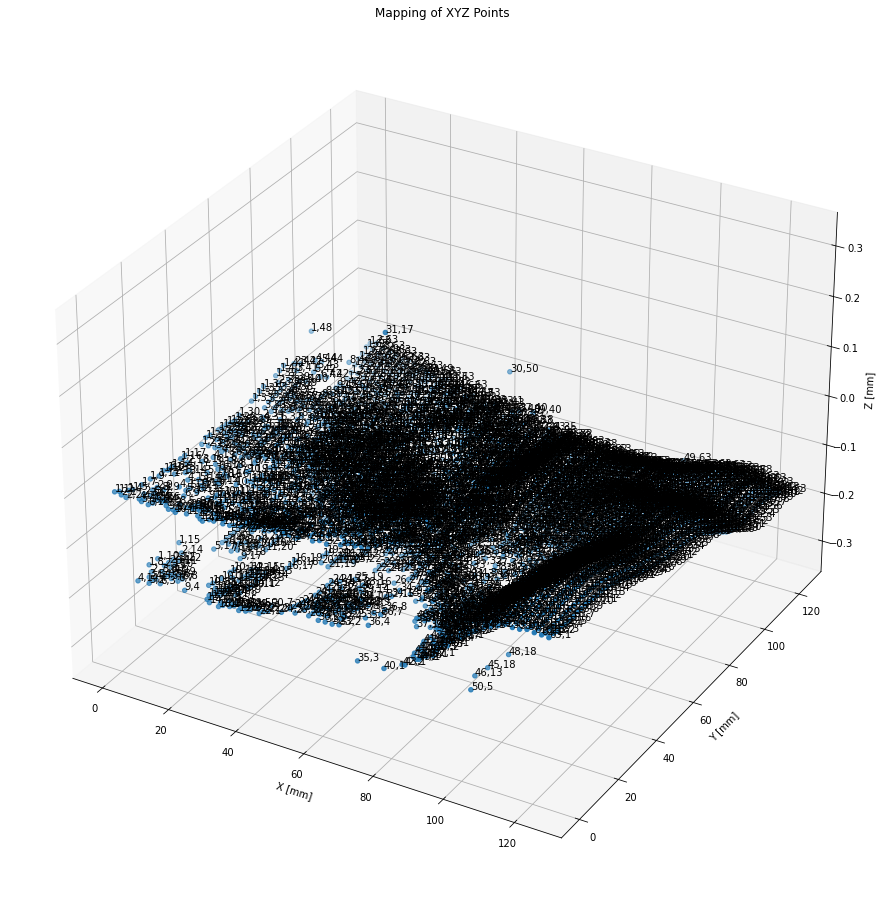

In [6]:
# Extract X, Y, Z values and corresponding point IDs
point_ids = []
x_values = []
y_values = []
z_values = []

for point_id, coords in point_data:
    point_ids.append(point_id)
    x_values.append(coords['X'])
    y_values.append(coords['Y'])
    z_values.append(coords['Z'])

# Plot the XYZ points relative to their point IDs
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values)

# Label each point with its corresponding ID
for i, point_id in enumerate(point_ids):
    ax.text(x_values[i], y_values[i], z_values[i], point_id)

# Set labels and title
ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
ax.set_title('Mapping of XYZ Points')

plt.show()


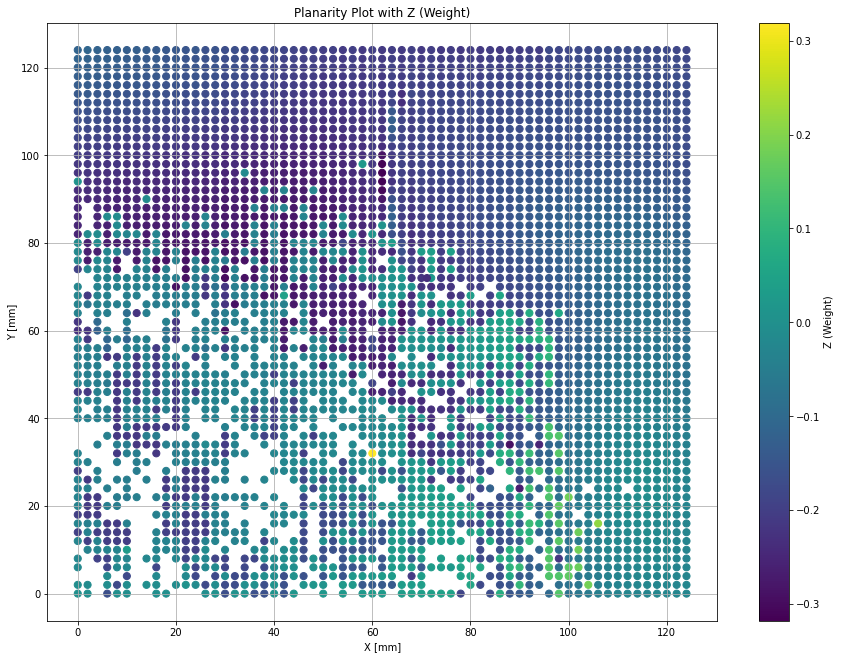

In [7]:
plt.figure(figsize=(15, 11))
plt.scatter(x_values, y_values, c=z_values, cmap='viridis', s=50)
plt.colorbar(label='Z (Weight)')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.title('Planarity Plot with Z (Weight)')
plt.grid(True)
plt.show()

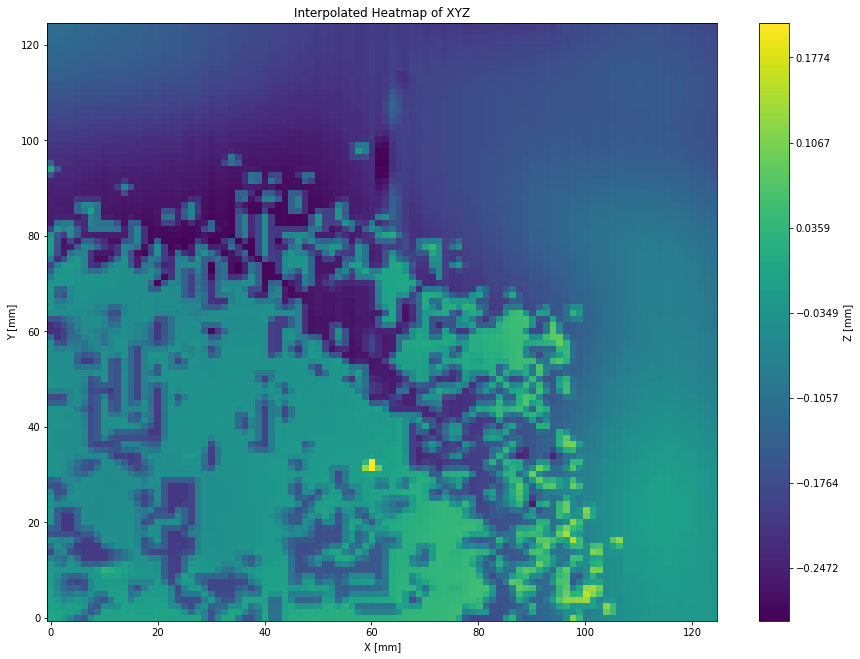

In [8]:
# Create a regular grid to interpolate onto
x_grid = np.linspace(min(x_values), max(x_values), 100)
y_grid = np.linspace(min(y_values), max(y_values), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate Z values onto the grid
Z = griddata((x_values, y_values), z_values, (X, Y), method='linear')
Z_grid = np.linspace(min(z_values), max(z_values), 100)
#colorbar = plt.colorbar(heatmap, label='Z [mm]', ticks=np.linspace(Z_grid.min(), Z_grid.max(), num=10))

# Plot the heatmap
plt.figure(figsize=(15, 11))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z [mm]', ticks=np.linspace(Z_grid.min(), Z_grid.max(), num=10))
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.title('Interpolated Heatmap of XYZ')
plt.show()

In [9]:
# Flatten the interpolated Z values
Z_flat = Z.flatten()

# Calculate the Root Mean Square (RMS)
rms = np.sqrt(np.mean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap:", rms)

Root Mean Square (RMS) of the heatmap: 0.1437439791340156


In [10]:
print(Z_flat)

[ 0.         -0.00125253 -0.02270707 ... -0.18173737 -0.18337374
 -0.184     ]


In [11]:
# Calculate the Root Mean Square (RMS) excluding NaN values
rms = np.sqrt(np.nanmean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap (excluding NaN points):", rms)

Root Mean Square (RMS) of the heatmap (excluding NaN points): 0.1437439791340156


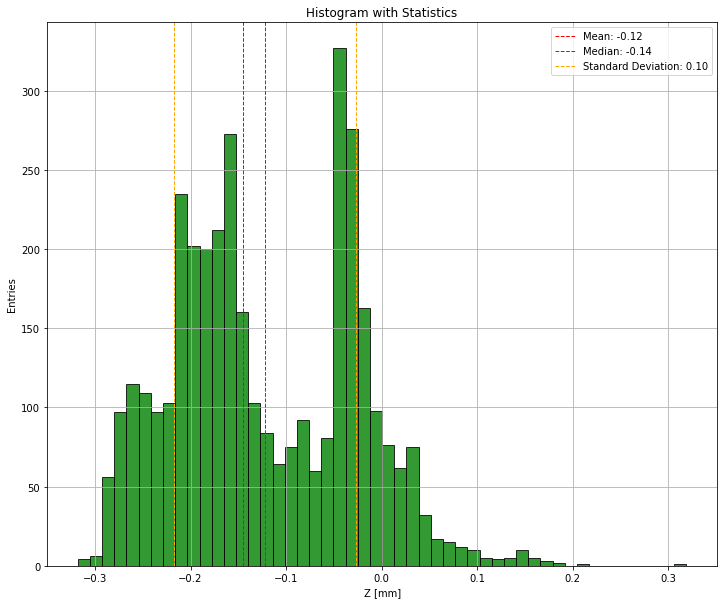

In [12]:
# Create the histogram
plt.figure(figsize=(12, 10))

plt.hist(z_values, bins=50, color='green', edgecolor='black', alpha=0.8)
# Add mean, median, and standard deviation lines
mean_value = np.mean(z_values)
median_value = np.median(z_values)
std_dev = np.std(z_values)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='orange', linestyle='dashed', linewidth=1)

plt.legend()
plt.xlabel('Z [mm]')
plt.ylabel('Entries')
plt.title('Histogram of Z Values')
plt.title('Histogram with Statistics')
plt.grid(True)
plt.show()

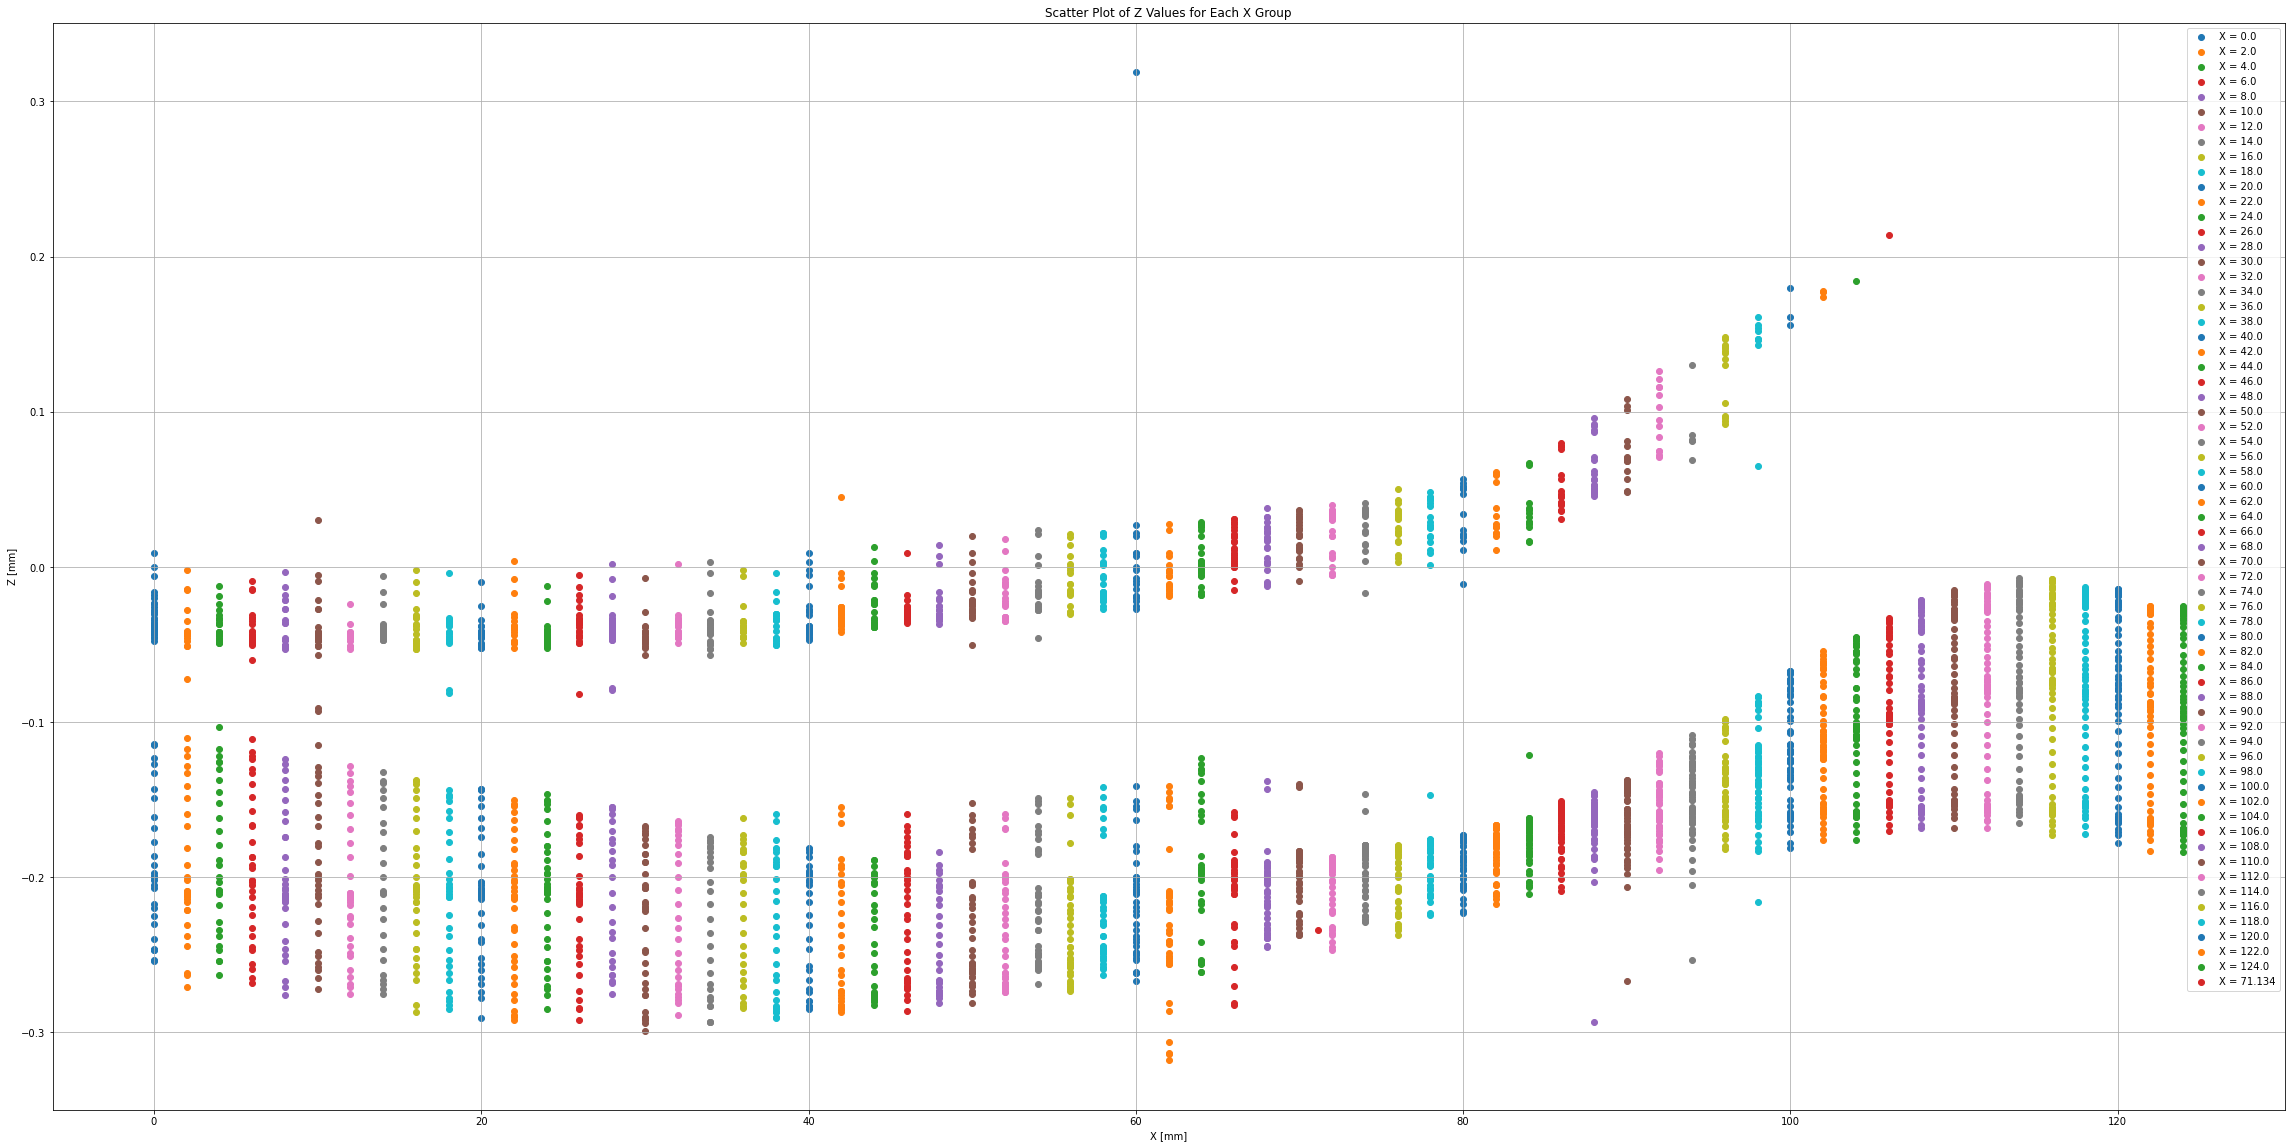

In [13]:
# Group Z values by X values
x_groups = {}
for x, z in zip(x_values, z_values):
    if x not in x_groups:
        x_groups[x] = []
    x_groups[x].append(z)

# Plot scatter plots for each X group
plt.figure(figsize=(40, 20))
for x, z_group in x_groups.items():
    plt.scatter([x] * len(z_group), z_group, label=f"X = {x}")

plt.xlabel('X [mm]')
plt.ylabel('Z [mm]')
plt.title('Scatter Plot of Z Values for Each X Group')
plt.legend()
plt.grid(True)
plt.show()

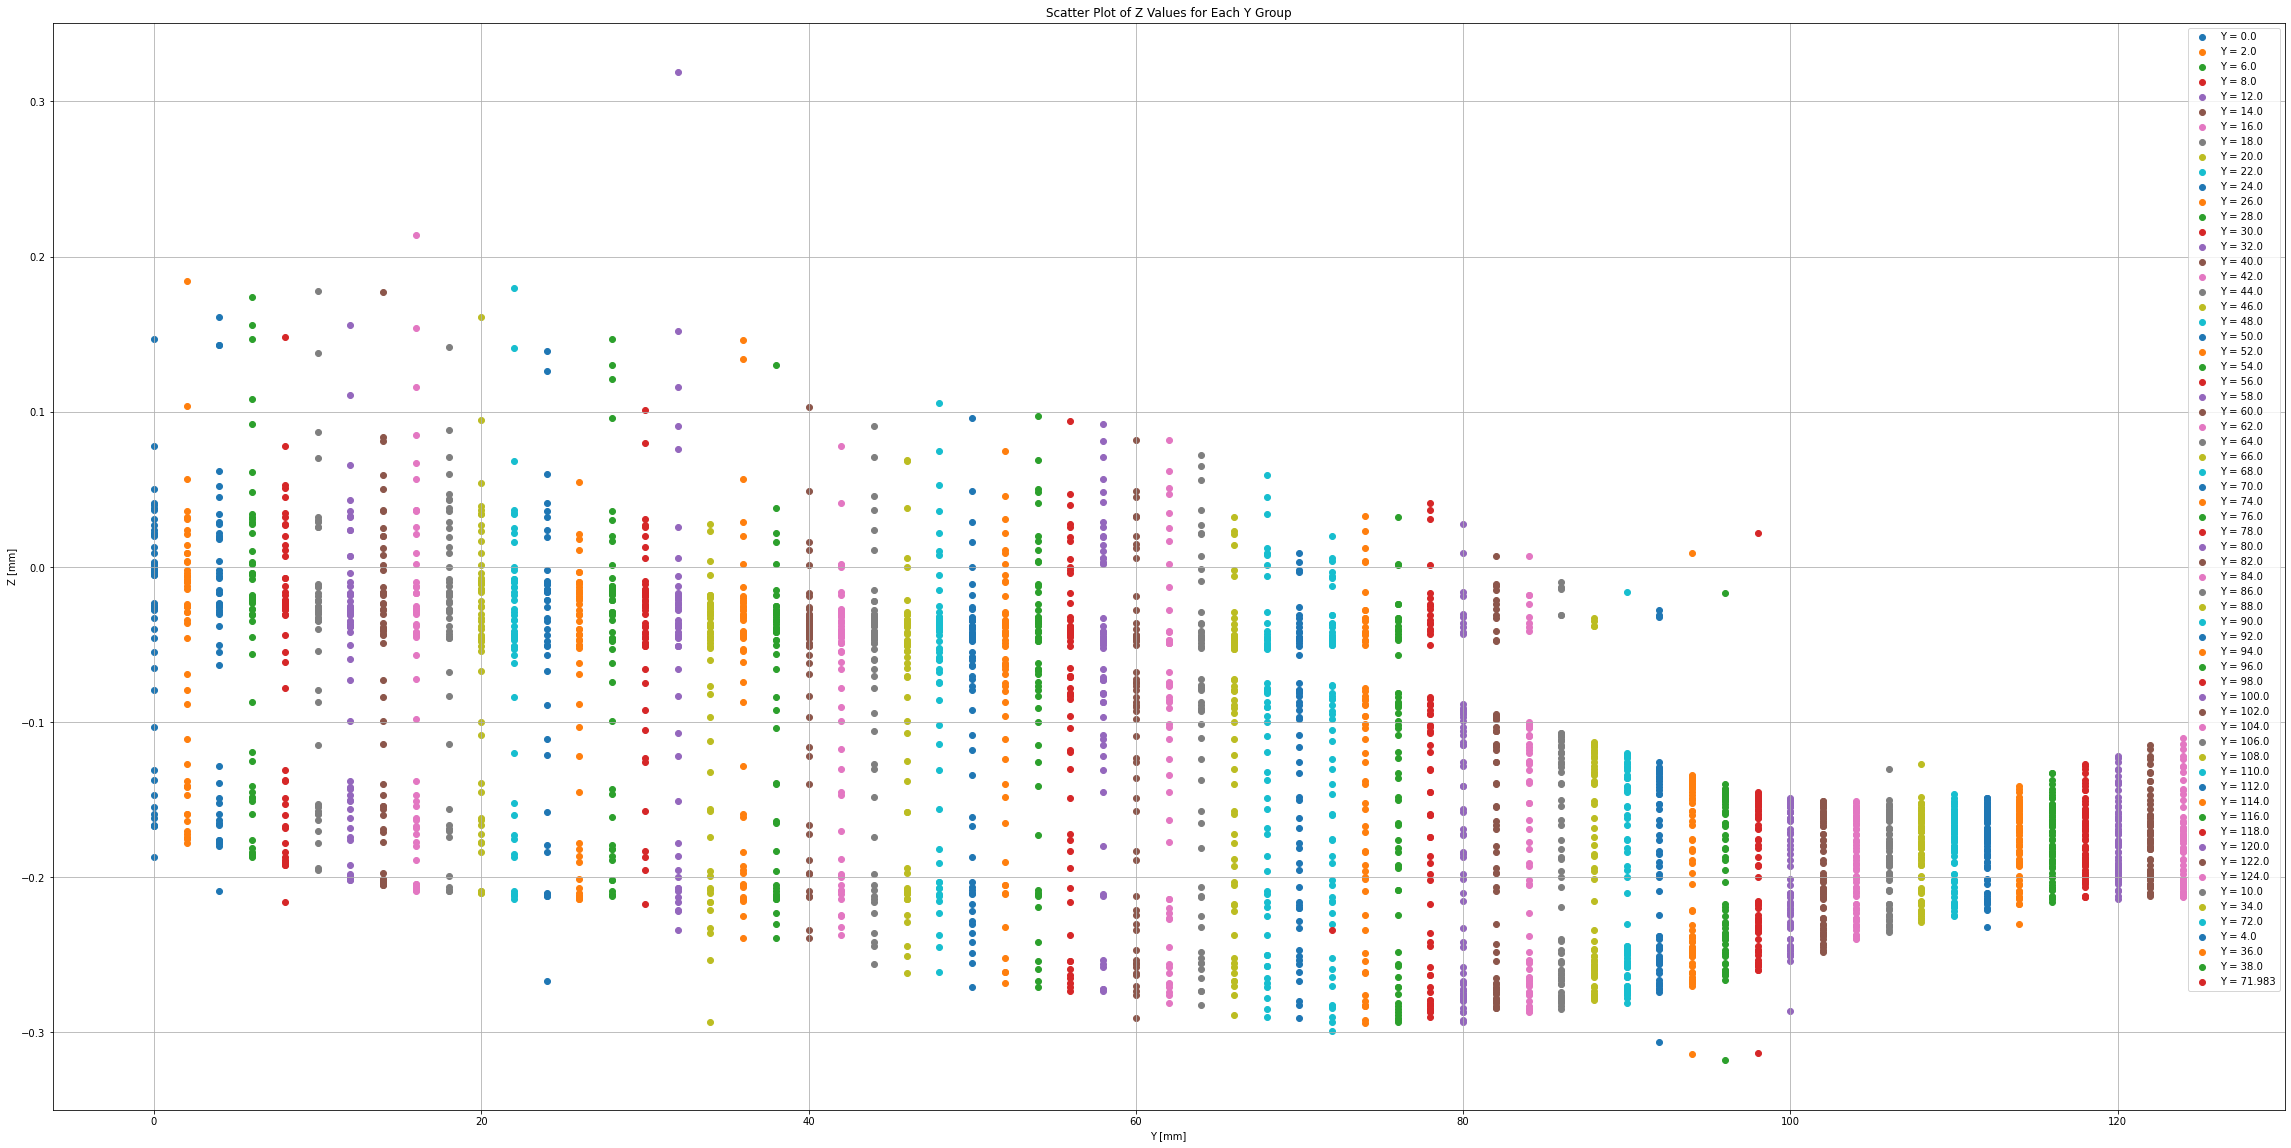

In [14]:
# Group Z values by Y values
y_groups = {}
for y, z in zip(y_values, z_values):
    if y not in y_groups:
        y_groups[y] = []
    y_groups[y].append(z)

# Plot scatter plots for each X group
plt.figure(figsize=(40, 20))
for y, z_group in y_groups.items():
    indices = range(1, len(z_values) + 1)
    #plt.scatter(indices, z_values, label=f'Y = {y}')

    plt.scatter([y] * len(z_group), z_group, label=f"Y = {y}")

plt.xlabel('Y [mm]')
plt.ylabel('Z [mm]')
plt.title('Scatter Plot of Z Values for Each Y Group')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Initialize variables to store point IDs and corresponding coordinates
point_data = []

# Regular expressions to match point ID and coordinate lines
point_id_pattern = r'\[([\d,]+)\]'
coord_pattern = r'Coord\. ([XYZ]) =\s*([-+]?\d+,\d+)'

# Extract point IDs and coordinates from lines
current_point_id = None
current_coords = {}

for line in lines:
    # Check if the line contains a point ID
    match_id = re.search(point_id_pattern, line)
    if match_id:
        current_point_id = match_id.group(1)
        current_coords = {}
        continue

    # Check if the line contains a coordinate
    match_coord = re.search(coord_pattern, line)
    if match_coord and current_point_id:
        coord_type = match_coord.group(1)
        coord_value = float(match_coord.group(2).replace(',', '.'))
        current_coords[coord_type] = coord_value

        # If all coordinates are found, add them to the point data
        if len(current_coords) == 3 and current_coords['X'] < 125 and current_coords['Y'] < 125:
            point_data.append((current_point_id, current_coords))
            current_point_id = None

# Convert the data to the desired format
formatted_data = []
for point_id, coords in point_data:
    formatted_coords = {'X': coords['X'], 'Y': coords['Y'], 'Z': coords['Z']}
    formatted_data.append((point_id, formatted_coords))

# Print the formatted data
for point_id, coords in formatted_data:
    print("Point ID:", point_id)
    print("Coordinates:", coords)


Point ID: 1,1
Coordinates: {'X': 0.0, 'Y': 0.0, 'Z': 0.0}
Point ID: 1,2
Coordinates: {'X': 0.0, 'Y': 2.0, 'Z': -0.006}
Point ID: 1,4
Coordinates: {'X': 0.0, 'Y': 6.0, 'Z': -0.018}
Point ID: 1,5
Coordinates: {'X': 0.0, 'Y': 8.0, 'Z': -0.023}
Point ID: 1,7
Coordinates: {'X': 0.0, 'Y': 12.0, 'Z': -0.028}
Point ID: 1,8
Coordinates: {'X': 0.0, 'Y': 14.0, 'Z': -0.197}
Point ID: 1,9
Coordinates: {'X': 0.0, 'Y': 16.0, 'Z': -0.03}
Point ID: 1,10
Coordinates: {'X': 0.0, 'Y': 18.0, 'Z': -0.199}
Point ID: 1,11
Coordinates: {'X': 0.0, 'Y': 20.0, 'Z': -0.038}
Point ID: 1,12
Coordinates: {'X': 0.0, 'Y': 22.0, 'Z': -0.034}
Point ID: 1,13
Coordinates: {'X': 0.0, 'Y': 24.0, 'Z': -0.04}
Point ID: 1,14
Coordinates: {'X': 0.0, 'Y': 26.0, 'Z': -0.04}
Point ID: 1,15
Coordinates: {'X': 0.0, 'Y': 28.0, 'Z': -0.202}
Point ID: 1,16
Coordinates: {'X': 0.0, 'Y': 30.0, 'Z': -0.038}
Point ID: 1,17
Coordinates: {'X': 0.0, 'Y': 32.0, 'Z': -0.038}
Point ID: 1,21
Coordinates: {'X': 0.0, 'Y': 40.0, 'Z': -0.043}
Point ID:

Coordinates: {'X': 20.0, 'Y': 62.0, 'Z': -0.214}
Point ID: 11,33
Coordinates: {'X': 20.0, 'Y': 64.0, 'Z': -0.051}
Point ID: 11,34
Coordinates: {'X': 20.0, 'Y': 66.0, 'Z': -0.051}
Point ID: 11,35
Coordinates: {'X': 20.0, 'Y': 68.0, 'Z': -0.051}
Point ID: 11,36
Coordinates: {'X': 20.0, 'Y': 70.0, 'Z': -0.291}
Point ID: 11,37
Coordinates: {'X': 20.0, 'Y': 72.0, 'Z': -0.049}
Point ID: 11,39
Coordinates: {'X': 20.0, 'Y': 76.0, 'Z': -0.043}
Point ID: 11,40
Coordinates: {'X': 20.0, 'Y': 78.0, 'Z': -0.041}
Point ID: 11,41
Coordinates: {'X': 20.0, 'Y': 80.0, 'Z': -0.278}
Point ID: 11,42
Coordinates: {'X': 20.0, 'Y': 82.0, 'Z': -0.274}
Point ID: 11,43
Coordinates: {'X': 20.0, 'Y': 84.0, 'Z': -0.269}
Point ID: 11,44
Coordinates: {'X': 20.0, 'Y': 86.0, 'Z': -0.265}
Point ID: 11,45
Coordinates: {'X': 20.0, 'Y': 88.0, 'Z': -0.26}
Point ID: 11,46
Coordinates: {'X': 20.0, 'Y': 90.0, 'Z': -0.256}
Point ID: 11,47
Coordinates: {'X': 20.0, 'Y': 92.0, 'Z': -0.252}
Point ID: 11,48
Coordinates: {'X': 20.0, '

Point ID: 23,46
Coordinates: {'X': 44.0, 'Y': 90.0, 'Z': -0.275}
Point ID: 23,47
Coordinates: {'X': 44.0, 'Y': 92.0, 'Z': -0.274}
Point ID: 23,48
Coordinates: {'X': 44.0, 'Y': 94.0, 'Z': -0.27}
Point ID: 23,49
Coordinates: {'X': 44.0, 'Y': 96.0, 'Z': -0.261}
Point ID: 23,50
Coordinates: {'X': 44.0, 'Y': 98.0, 'Z': -0.257}
Point ID: 23,51
Coordinates: {'X': 44.0, 'Y': 100.0, 'Z': -0.249}
Point ID: 23,52
Coordinates: {'X': 44.0, 'Y': 102.0, 'Z': -0.243}
Point ID: 23,53
Coordinates: {'X': 44.0, 'Y': 104.0, 'Z': -0.227}
Point ID: 23,54
Coordinates: {'X': 44.0, 'Y': 106.0, 'Z': -0.232}
Point ID: 23,55
Coordinates: {'X': 44.0, 'Y': 108.0, 'Z': -0.222}
Point ID: 23,56
Coordinates: {'X': 44.0, 'Y': 110.0, 'Z': -0.218}
Point ID: 23,57
Coordinates: {'X': 44.0, 'Y': 112.0, 'Z': -0.21}
Point ID: 23,58
Coordinates: {'X': 44.0, 'Y': 114.0, 'Z': -0.204}
Point ID: 23,59
Coordinates: {'X': 44.0, 'Y': 116.0, 'Z': -0.2}
Point ID: 23,60
Coordinates: {'X': 44.0, 'Y': 118.0, 'Z': -0.197}
Point ID: 23,61
Coo

Coordinates: {'X': 64.0, 'Y': 102.0, 'Z': -0.197}
Point ID: 33,53
Coordinates: {'X': 64.0, 'Y': 104.0, 'Z': -0.157}
Point ID: 33,54
Coordinates: {'X': 64.0, 'Y': 106.0, 'Z': -0.13}
Point ID: 33,55
Coordinates: {'X': 64.0, 'Y': 108.0, 'Z': -0.127}
Point ID: 33,56
Coordinates: {'X': 64.0, 'Y': 110.0, 'Z': -0.146}
Point ID: 33,57
Coordinates: {'X': 64.0, 'Y': 112.0, 'Z': -0.186}
Point ID: 33,58
Coordinates: {'X': 64.0, 'Y': 114.0, 'Z': -0.192}
Point ID: 33,59
Coordinates: {'X': 64.0, 'Y': 116.0, 'Z': -0.194}
Point ID: 33,60
Coordinates: {'X': 64.0, 'Y': 118.0, 'Z': -0.195}
Point ID: 33,61
Coordinates: {'X': 64.0, 'Y': 120.0, 'Z': -0.196}
Point ID: 33,62
Coordinates: {'X': 64.0, 'Y': 122.0, 'Z': -0.2}
Point ID: 33,63
Coordinates: {'X': 64.0, 'Y': 124.0, 'Z': -0.202}
Point ID: 34,1
Coordinates: {'X': 66.0, 'Y': 0.0, 'Z': 0.031}
Point ID: 34,2
Coordinates: {'X': 66.0, 'Y': 2.0, 'Z': 0.031}
Point ID: 34,4
Coordinates: {'X': 66.0, 'Y': 6.0, 'Z': 0.029}
Point ID: 34,5
Coordinates: {'X': 66.0, '

Coordinates: {'X': 88.0, 'Y': 2.0, 'Z': -0.147}
Point ID: 45,3
Coordinates: {'X': 88.0, 'Y': 4.0, 'Z': 0.062}
Point ID: 45,4
Coordinates: {'X': 88.0, 'Y': 6.0, 'Z': 0.092}
Point ID: 45,5
Coordinates: {'X': 88.0, 'Y': 8.0, 'Z': 0.053}
Point ID: 45,6
Coordinates: {'X': 88.0, 'Y': 10.0, 'Z': 0.087}
Point ID: 45,7
Coordinates: {'X': 88.0, 'Y': 12.0, 'Z': -0.147}
Point ID: 45,8
Coordinates: {'X': 88.0, 'Y': 14.0, 'Z': -0.147}
Point ID: 45,9
Coordinates: {'X': 88.0, 'Y': 16.0, 'Z': 0.057}
Point ID: 45,10
Coordinates: {'X': 88.0, 'Y': 18.0, 'Z': 0.088}
Point ID: 45,11
Coordinates: {'X': 88.0, 'Y': 20.0, 'Z': -0.145}
Point ID: 45,12
Coordinates: {'X': 88.0, 'Y': 22.0, 'Z': -0.152}
Point ID: 45,13
Coordinates: {'X': 88.0, 'Y': 24.0, 'Z': 0.06}
Point ID: 45,15
Coordinates: {'X': 88.0, 'Y': 28.0, 'Z': 0.096}
Point ID: 45,16
Coordinates: {'X': 88.0, 'Y': 30.0, 'Z': -0.157}
Point ID: 45,17
Coordinates: {'X': 88.0, 'Y': 32.0, 'Z': 0.091}
Point ID: 45,18
Coordinates: {'X': 88.0, 'Y': 34.0, 'Z': -0.29

Point ID: 55,28
Coordinates: {'X': 108.0, 'Y': 54.0, 'Z': -0.079}
Point ID: 55,29
Coordinates: {'X': 108.0, 'Y': 56.0, 'Z': -0.083}
Point ID: 55,30
Coordinates: {'X': 108.0, 'Y': 58.0, 'Z': -0.087}
Point ID: 55,31
Coordinates: {'X': 108.0, 'Y': 60.0, 'Z': -0.089}
Point ID: 55,32
Coordinates: {'X': 108.0, 'Y': 62.0, 'Z': -0.086}
Point ID: 55,33
Coordinates: {'X': 108.0, 'Y': 64.0, 'Z': -0.092}
Point ID: 55,34
Coordinates: {'X': 108.0, 'Y': 66.0, 'Z': -0.091}
Point ID: 55,35
Coordinates: {'X': 108.0, 'Y': 68.0, 'Z': -0.09}
Point ID: 55,36
Coordinates: {'X': 108.0, 'Y': 70.0, 'Z': -0.089}
Point ID: 55,37
Coordinates: {'X': 108.0, 'Y': 72.0, 'Z': -0.089}
Point ID: 55,38
Coordinates: {'X': 108.0, 'Y': 74.0, 'Z': -0.089}
Point ID: 55,39
Coordinates: {'X': 108.0, 'Y': 76.0, 'Z': -0.089}
Point ID: 55,40
Coordinates: {'X': 108.0, 'Y': 78.0, 'Z': -0.089}
Point ID: 55,41
Coordinates: {'X': 108.0, 'Y': 80.0, 'Z': -0.094}
Point ID: 55,42
Coordinates: {'X': 108.0, 'Y': 82.0, 'Z': -0.098}
Point ID: 5

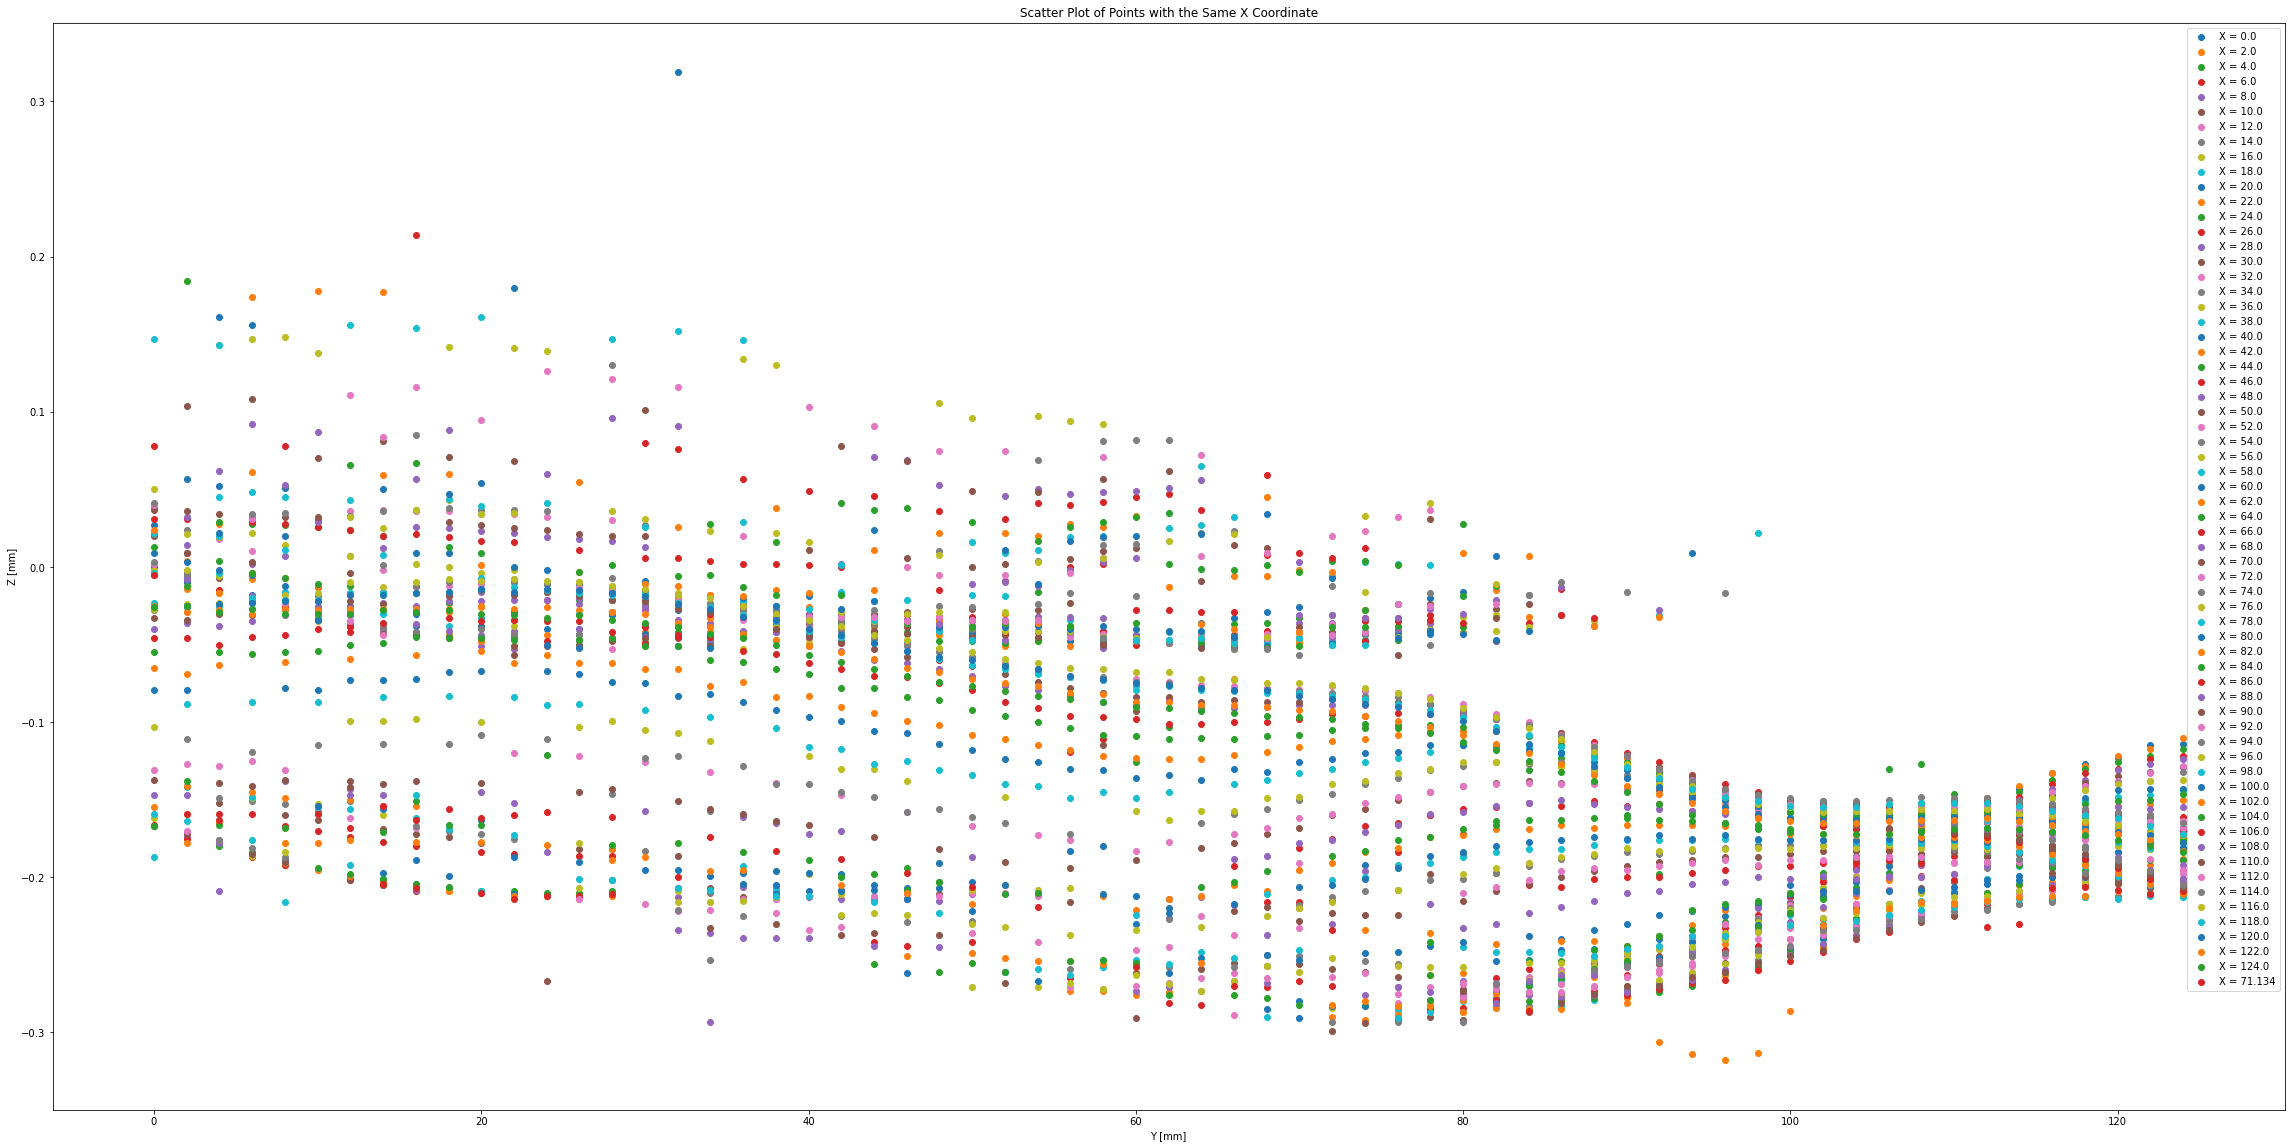

In [16]:
# Group the data by X coordinate
plt.figure(figsize=(40, 20))

grouped_data = {}
for point_id, coords in formatted_data:
    x_coord = coords['X']
    if x_coord not in grouped_data:
        grouped_data[x_coord] = []
    grouped_data[x_coord].append((point_id, coords['Y'], coords['Z']))

# Plot each group separately
for x, points in grouped_data.items():
    point_ids, ys, zs = zip(*points)
    plt.scatter(ys, zs, label=f'X = {x}')

# Add labels and legend
plt.xlabel('Y [mm]')
plt.ylabel('Z [mm]')
plt.title('Scatter Plot of Points with the Same X Coordinate')
plt.legend()
plt.show()

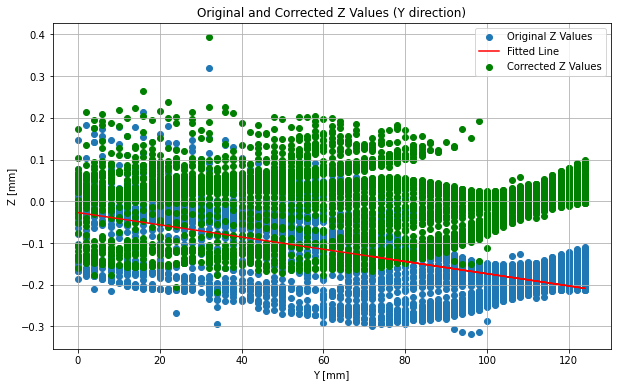

In [17]:
# Extract X, Y, and Z values from the data
x_values = []
y_values = []
z_values = []
for position, coords in formatted_data:
    x_values.append(coords['X'])
    y_values.append(coords['Y'])
    z_values.append(coords['Z'])

# Perform linear regression to fit a line to the data
slope_y, intercept_y = np.polyfit(y_values, z_values, 1)

# Calculate the fitted line
fitted_line_y = slope_y * np.array(y_values) + intercept_y

# Subtract the fitted line from the original Z values to correct for the slope in the Y direction
corrected_z_values_y = np.array(z_values) - fitted_line_y

# Plot the original and corrected Z values
plt.figure(figsize=(10, 6))
plt.scatter(y_values, z_values, label='Original Z Values')
plt.plot(y_values, fitted_line_y, color='red', label='Fitted Line')
plt.scatter(y_values, corrected_z_values_y, color='green', label='Corrected Z Values')
plt.xlabel('Y [mm]')
plt.ylabel('Z [mm]')
plt.title('Original and Corrected Z Values (Y direction)')
plt.legend()
plt.grid(True)
plt.show()

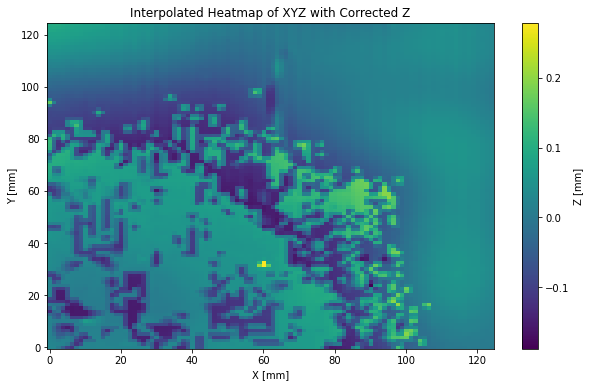

In [18]:
# Create a regular grid to interpolate onto
x_grid = np.linspace(min(x_values), max(x_values), 100)
y_grid = np.linspace(min(y_values), max(y_values), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate Z values onto the grid
Z = griddata((x_values, y_values), corrected_z_values_y, (X, Y), method='linear')

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z [mm]')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.title('Interpolated Heatmap of XYZ with Corrected Z')
plt.show()

In [19]:
# Flatten the interpolated Z values
Z_flat = Z.flatten()

# Calculate the Root Mean Square (RMS) excluding NaN values
rms = np.sqrt(np.nanmean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap (excluding NaN points):", rms)

Root Mean Square (RMS) of the heatmap (excluding NaN points): 0.06323620120764127


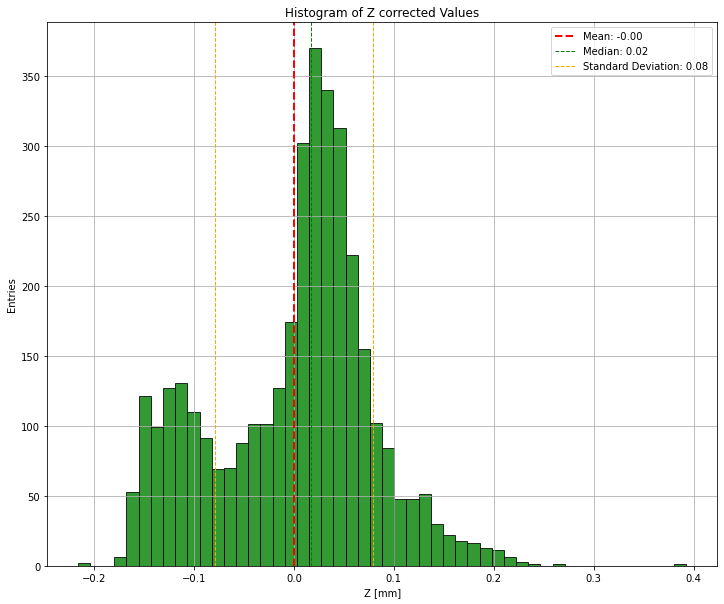

In [20]:
# Create the histogram
plt.figure(figsize=(12, 10))

plt.hist(corrected_z_values_y, bins=50, color='green', edgecolor='black', alpha=0.8)
# Add mean, median, and standard deviation lines
mean_value = np.mean(corrected_z_values_y)
median_value = np.median(corrected_z_values_y)
std_dev = np.std(corrected_z_values_y)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='orange', linestyle='dashed', linewidth=1)

plt.legend()
plt.xlabel('Z [mm]')
plt.ylabel('Entries')
plt.title('Histogram of Z corrected Values')
plt.grid(True)
plt.show()

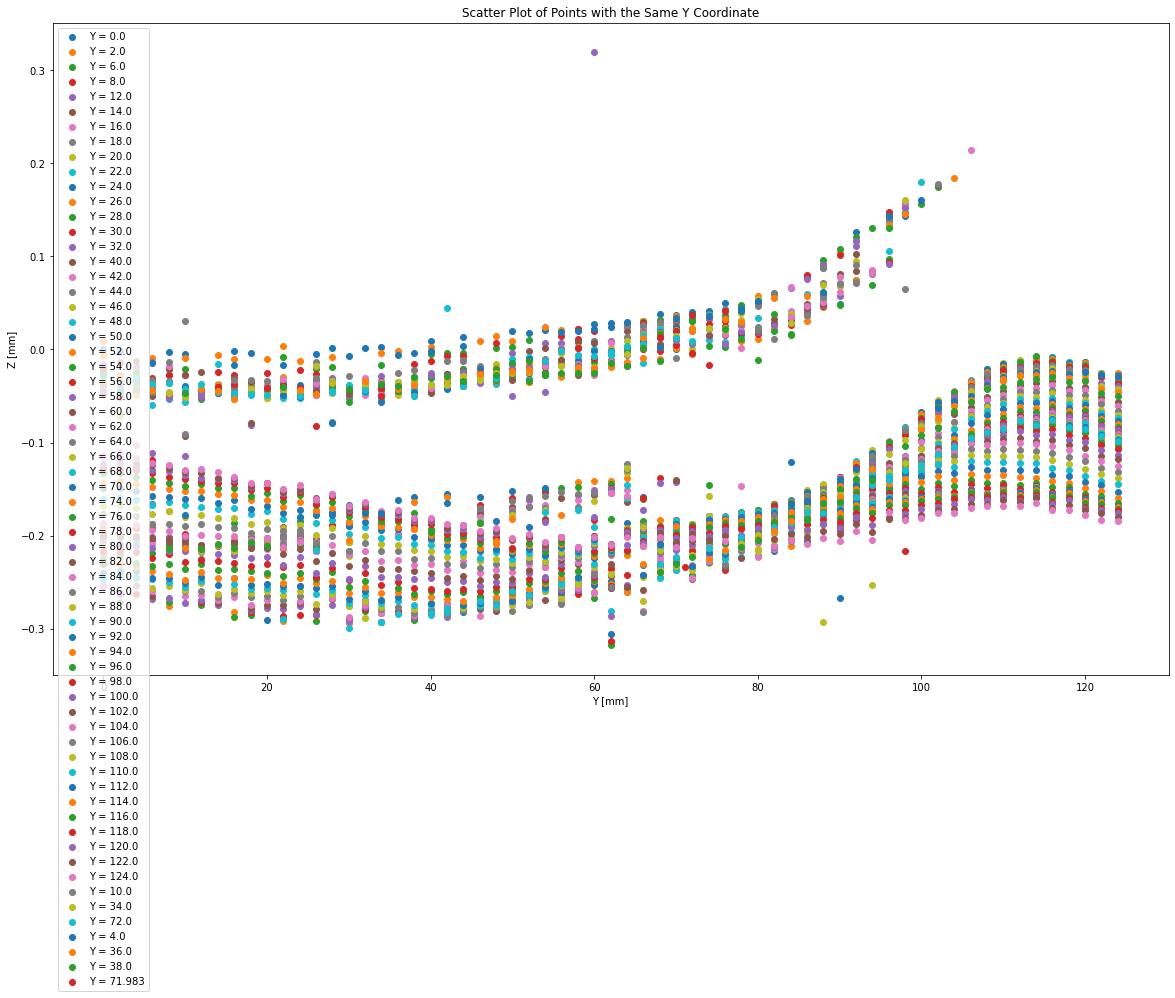

In [21]:
# Group the data by X coordinate
plt.figure(figsize=(20, 12))

grouped_data = {}
for point_id, coords in formatted_data:
    y_coord = coords['Y']
    if y_coord not in grouped_data:
        grouped_data[y_coord] = []
    grouped_data[y_coord].append((point_id, coords['X'], coords['Z']))

# Plot each group separately
for y, points in grouped_data.items():
    point_ids, xs, zs = zip(*points)
    plt.scatter(xs, zs, label=f'Y = {y}')

# Add labels and legend
plt.xlabel('Y [mm]')
plt.ylabel('Z [mm]')
plt.title('Scatter Plot of Points with the Same Y Coordinate')
plt.legend()
plt.show()

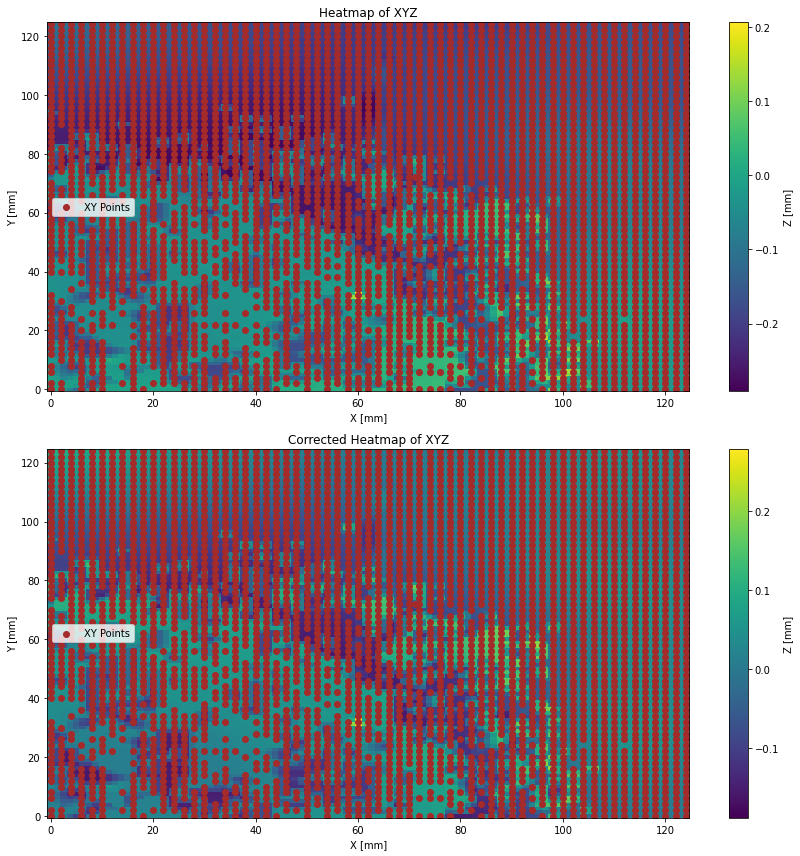

In [22]:
plt.figure(figsize=(12, 12))

Z = griddata((x_values, y_values), z_values, (X, Y), method='linear')

# Plot the heatmap
plt.subplot(2, 1, 1)
im = plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(im, label='Z [mm]')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.title('Heatmap of XYZ')

# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='brown', marker='o', label='XY Points')
plt.legend()

Z = griddata((x_values, y_values), corrected_z_values_y, (X, Y), method='linear')

# Plot the scatter plot
plt.subplot(2, 1, 2)
sc = plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(sc, label='Z [mm]')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.title('Corrected Heatmap of XYZ')
# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='brown', marker='o', label='XY Points')
plt.legend()


plt.tight_layout()
plt.show()

In [23]:
## Fitting a plane to a set of 3D points is a common technique used in planarity analysis. This technique is often employed in various fields such as computer vision, robotics, geomatics, and manufacturing to assess the flatness or planarity of a surface.

#The fitting of a plane involves finding the best-fitting plane that minimizes the sum of squared distances between the plane and the data points. This can be achieved using mathematical techniques such as least squares regression or principal component analysis (PCA).

#Once the plane is fitted to the data, various metrics can be calculated to assess the planarity, such as the root mean square (RMS) of the distances between the data points and the fitted plane, or the deviation of the data points from the plane.

#Overall, fitting a plane to the data provides a quantitative measure of planarity and can be a useful tool for quality control, surface inspection, and geometric analysis.


In [24]:
#The goal is to find the values of a and b that minimize the sum of the squared residuals. This is why it's called "least squares" regression.

In [25]:
def fit_plane(formatted_data):   
    # Extract X, Y, and Z coordinates from the formatted data 
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Construct the design matrix contains the independent variables
    A = np.vstack((X, Y, np.ones_like(X))).T #stacking X, Y, and a column of ones (for the intercept term) vertically and transposing it. 
    #This design matrix is used in the least squares regression.
    
    # Perform least squares regression to find the plane parameters
    #params, _, _, _ = np.linalg.lstsq(A, Z, rcond=None) 
    params, residuals, rank, singular_values = np.linalg.lstsq(A, Z, rcond=None)

    #contains the coefficients of the plane equation (a, b, c) that minimize the sum of squared residuals.
    #assigned to _ to indicate that they're being ignored.
    
    # Extract plane parameters (coefficients of the plane equation: ax + by + c = z)
    a, b, c = params
    residuals = residuals  #the residual sum of squares, which represents the sum of squared differences between the observed and predicted values of Z
    singular_values = singular_values # the singular values of A
    return a, b, c, residuals, singular_values

a, b, c, residuals, singular_values = fit_plane(formatted_data)
print("Plane parameters: a =", a, ", b =", b, ", c =", c, ", residuals = ", residuals, ", singular values = ", singular_values)


Plane parameters: a = 0.00045547329693566136 , b = -0.0014418665756913977 , c = -0.05772536875966281 , residuals =  [21.86340512] , singular values =  [5899.27636426 2236.49922125   21.68431844]


In [26]:
# Visualize the fitted plane and original points
def visualize_plane_and_points(formatted_data, a, b, c, residuals, singular_values):
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Create a meshgrid for X and Y coordinates
    X_grid, Y_grid = np.meshgrid(np.linspace(min(X), max(X), 10), np.linspace(min(Y), max(Y), 10))
    
    # Calculate Z values for the fitted plane
    Z_plane = a * X_grid + b * Y_grid + c

    # Plot the points
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, color='b', label='Original Points')
    
    # Plot the fitted plane
    ax.plot_surface(X_grid, Y_grid, Z_plane, alpha=0.5, color='r', label='Fitted Plane')
    
    # Set labels and title
    ax.set_xlabel('X [mm]')
    ax.set_ylabel('Y [mm]')
    ax.set_zlabel('Z [mm]')
    ax.set_title('Fitted Plane and Original Points')
    
    # Add legend
    ax.legend()
    
    # Show plot
    plt.show()

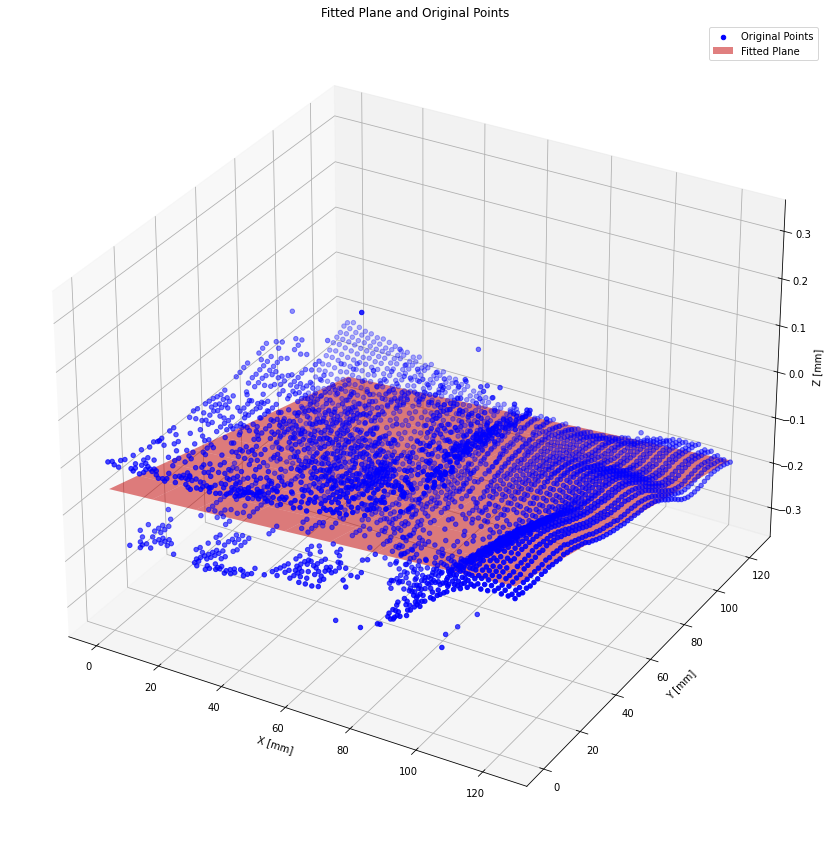

In [27]:
#a, b, c = fit_plane(formatted_data)
a, b, c, residuals, singular_values = fit_plane(formatted_data)
#visualize_plane_and_points(formatted_data, a, b, c)
visualize_plane_and_points(formatted_data, a, b, c, residuals, singular_values)

In [28]:
def calculate_planarity_metrics(formatted_data, a, b, c):
    # Extract X, Y, and Z coordinates from the formatted data
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Calculate distances from points to the fitted plane
    distances = np.abs(a * X + b * Y - Z + c) / np.sqrt(a**2 + b**2 + 1)
    
    # Calculate RMS of the distances
    rms_distance = np.sqrt(np.mean(distances**2))
    
    # Calculate deviation of the points from the plane
    deviation = distances.mean()
    
    return rms_distance, deviation

In [29]:
rms_distance, deviation = calculate_planarity_metrics(formatted_data, a, b, c)
print("RMS Distance:", rms_distance) #the root mean square (RMS) of the distances between the data points and the fitted plane
print("Deviation:", deviation) #the deviation of the data points from the plane


RMS Distance: 0.07763983911081519
Deviation: 0.06093847675463722


In [30]:
##It calculates the distances from each point to the fitted plane, then computes the RMS of these distances and the deviation of the points from the plane.

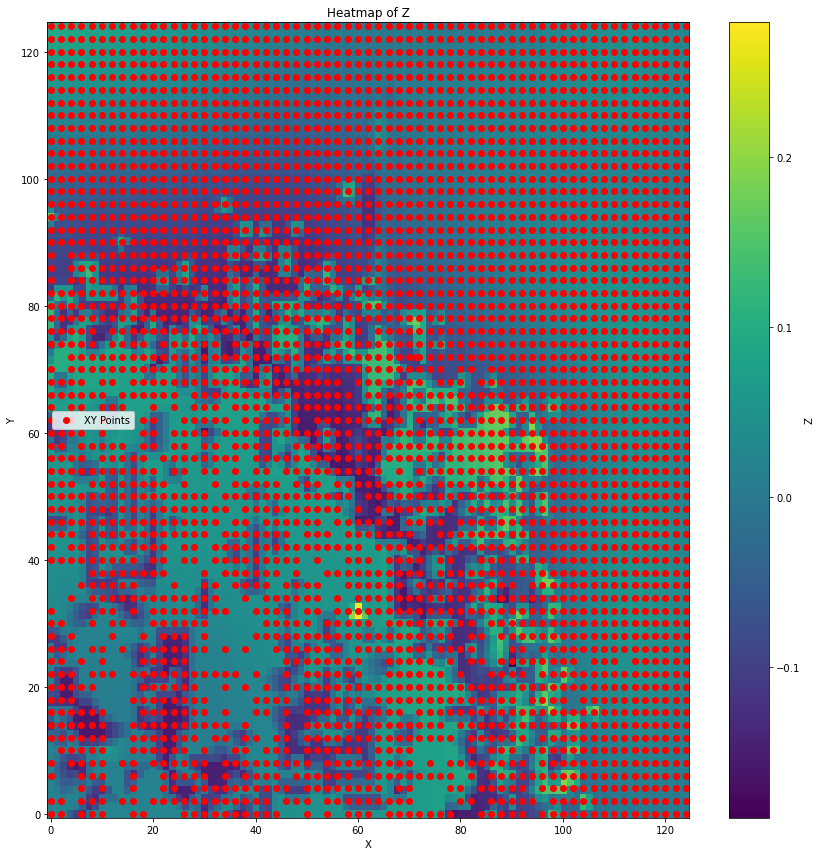

In [31]:
# Define the point IDs
point_4_4_id = '4,4'
point_4_13_id = '4,13'
point_13_4_id = '13,4'
point_13_13_id = '13,13'


# Find the XY coordinates corresponding to the specified point IDs
point_4_4_xy = None
point_4_13_xy = None
point_13_4_xy = None
point_13_13_xy = None

for point_id, coords in formatted_data:
    if point_id == point_4_4_id:
        point_4_4_xy = (coords['X'], coords['Y'])
    elif point_id == point_4_13_id:
        point_4_13_xy = (coords['X'], coords['Y'])
    elif point_id == point_13_4_id:
        point_13_4_xy = (coords['X'], coords['Y'])
    elif point_id == point_13_13_id:
        point_13_13_xy = (coords['X'], coords['Y'])

# Plot the heatmap of Z
plt.figure(figsize=(12, 12))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of Z')

# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='red', marker='o', label='XY Points')

# Connect specified points with lines
#plt.plot([point_4_13_xy[0], point_13_13_xy[0]], [point_4_13_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2)
#plt.plot([point_13_4_xy[0], point_13_13_xy[0]], [point_13_4_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
#plt.plot([point_4_4_xy[0], point_4_13_xy[0]], [point_4_4_xy[1], point_4_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
#plt.plot([point_4_4_xy[0], point_13_4_xy[0]], [point_4_4_xy[1], point_13_4_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular

plt.legend()
plt.tight_layout()
plt.show()


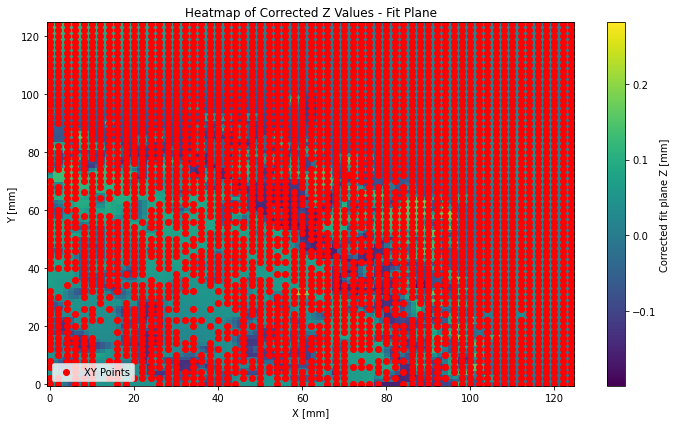

In [32]:
x_values = np.array([coords['X'] for _, coords in formatted_data])
y_values = np.array([coords['Y'] for _, coords in formatted_data])
z_values = np.array([coords['Z'] for _, coords in formatted_data])

# Correct the Z values based on the fitted plane
corrected_z_values = z_values - (a * x_values + b * y_values + c)

# Create a grid for the heatmap
X, Y = np.meshgrid(np.linspace(min(x_values), max(x_values), 100),
                   np.linspace(min(y_values), max(y_values), 100))

# Interpolate the corrected Z values onto the grid
Z_corrected = griddata((x_values, y_values), corrected_z_values, (X, Y), method='linear')


# Plot the heatmap of corrected Z values
plt.figure(figsize=(10, 6))
plt.pcolormesh(X, Y, Z_corrected, cmap='viridis')
plt.colorbar(label='Corrected fit plane Z [mm]')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.title('Heatmap of Corrected Z Values - Fit Plane')

# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='red', marker='o', label='XY Points')

plt.legend()
plt.tight_layout()
plt.show()

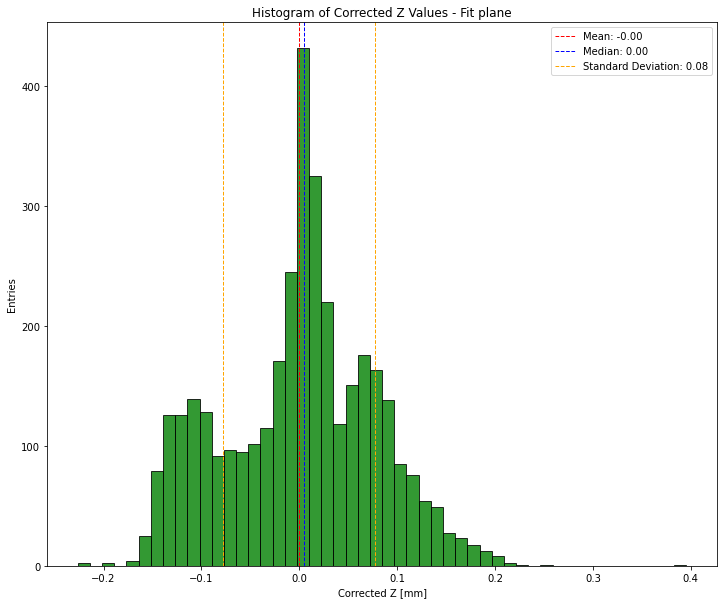

In [33]:
# Flatten the 2D array Z_corrected into a 1D array
Z_corrected_flat = corrected_z_values.flatten()

# Plot the histogram of the corrected Z values
plt.figure(figsize=(12, 10))
plt.hist(Z_corrected_flat, bins=50, color='green', edgecolor='black', alpha=0.8)
# Add mean, median, and standard deviation lines
mean_value = np.mean(Z_corrected_flat)
median_value = np.median(Z_corrected_flat)
std_deviation = np.std(Z_corrected_flat)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_deviation, color='orange', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {std_deviation:.2f}')
plt.axvline(mean_value - std_deviation, color='orange', linestyle='dashed', linewidth=1)
plt.xlabel('Corrected Z [mm]')
plt.ylabel('Entries')
plt.title('Histogram of Corrected Z Values - Fit plane')
plt.legend()
plt.show()

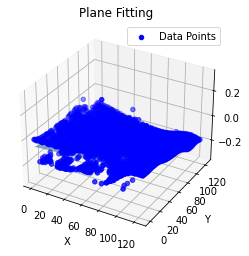

In [34]:
X_test = np.column_stack((x_values, y_values, np.ones_like(x_values)))

# Fit linear regression model
model = LinearRegression().fit(X_test, z_values)

# Get the coefficients (normal vector) of the plane
normal_vector = model.coef_
intercept = model.intercept_

# Generate points on the plane for visualization
x_plane = np.linspace(min(x_values), max(x_values), 10)
y_plane = np.linspace(min(y_values), max(y_values), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = normal_vector[0] * x_plane + normal_vector[1] * y_plane + intercept

# Plot the original data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values, c='b', marker='o', label='Data Points')

# Plot the plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plane Fitting')

plt.legend()
plt.show()
